# 텍스트 수집 및 키워드 분석

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


## 한국어 형태소 분석기 설치

* 한국어 자연어 처리 konlpy 라이브러리
* 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-02-05 16:40:27--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-02-05 16:40:27--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc432d3b08025b9071b6cb7394d.dl.dropboxusercontent.com/cd/0/get/B14dJ5bREv1-yKiM4Z35SSbSCsof66g6WYyCVspASBNKothe2jYOtLh4lKny4jtNcUcBCkM9tb-INyEIlm1dw3NYXLfRq4QRpruwIJ9b9I4ZZTuKaMJf0Yjv_9Esx05zHiO9KvbpBfznSFQHXhXr9-uCpfvlOtbYfQeRjfae2izSGir1SshObK205u_jt_uOago/file?dl=1# [following]
--2023-02-05 16:40:28--  https://ucc432d3b08025b9071b6cb7394d.dl.dropboxusercontent.com/cd/0/get/B14dJ5bRE

## 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

### 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [3]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [4]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
  reviews.append(i.split("\t")[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


### 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [5]:
from konlpy.tag import  Mecab
tagger = Mecab()

reviews_nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    reviews_nouns.append(noun)

reviews_nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

#### 불용어(Stopwords) 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* "사용자가 직접" 불용어 사전을 유지하면서 불필요한 단어 제거 필요
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`)


In [6]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데"
stop_words = stop_words.split(" ")
print(stop_words)

['영화', '전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '후', '이', '애', '씨', '속', '뿐', '밋', '그', '급', 'ㄷ', '데']


#### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [7]:
reviews_nouns = []

for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      reviews_nouns.append(noun)

reviews_nouns[:10]

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '우리', '나라']

### 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [8]:
from collections import Counter

reviews_nouns_counter = Counter(reviews_nouns)
top_reviews_nouns = dict(reviews_nouns_counter.most_common(100))
top_reviews_nouns

{'연기': 9175,
 '최고': 8813,
 '평점': 8514,
 '스토리': 7163,
 '생각': 6943,
 '드라마': 6896,
 '사람': 6742,
 '감동': 6489,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '작품': 3985,
 '하나': 3923,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '액션': 3568,
 '기대': 3465,
 '장면': 3262,
 '이게': 3046,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '이야기': 2947,
 '이해': 2745,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '마음': 2128,
 '굿': 2110,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060,
 '공포': 2048,
 '전개': 2035,
 '짜증': 2011,
 '소재': 1999,
 '느낌': 1950,
 '필요': 1929,
 '일본': 1878,
 '반전': 1868,
 '수준': 1864,
 '음악': 1852,
 '매력': 1832,
 '가슴': 1817,
 '인간': 1811,
 '짱': 1809,
 '아이': 1749,
 '원작': 1705,
 '눈물': 1704,
 '코미디': 1598,
 '추천': 1579,
 '자체': 1558,
 '실망': 1557,
 '대박': 1495,
 '눈': 1484,
 '몰입': 1453,
 '캐릭터': 1440,
 '나라': 1409,
 '가족': 1401,
 '건지': 1397,
 '연기력': 1387,
 '여운': 1386,
 '시리즈': 1

### 단어 빈도 시각화

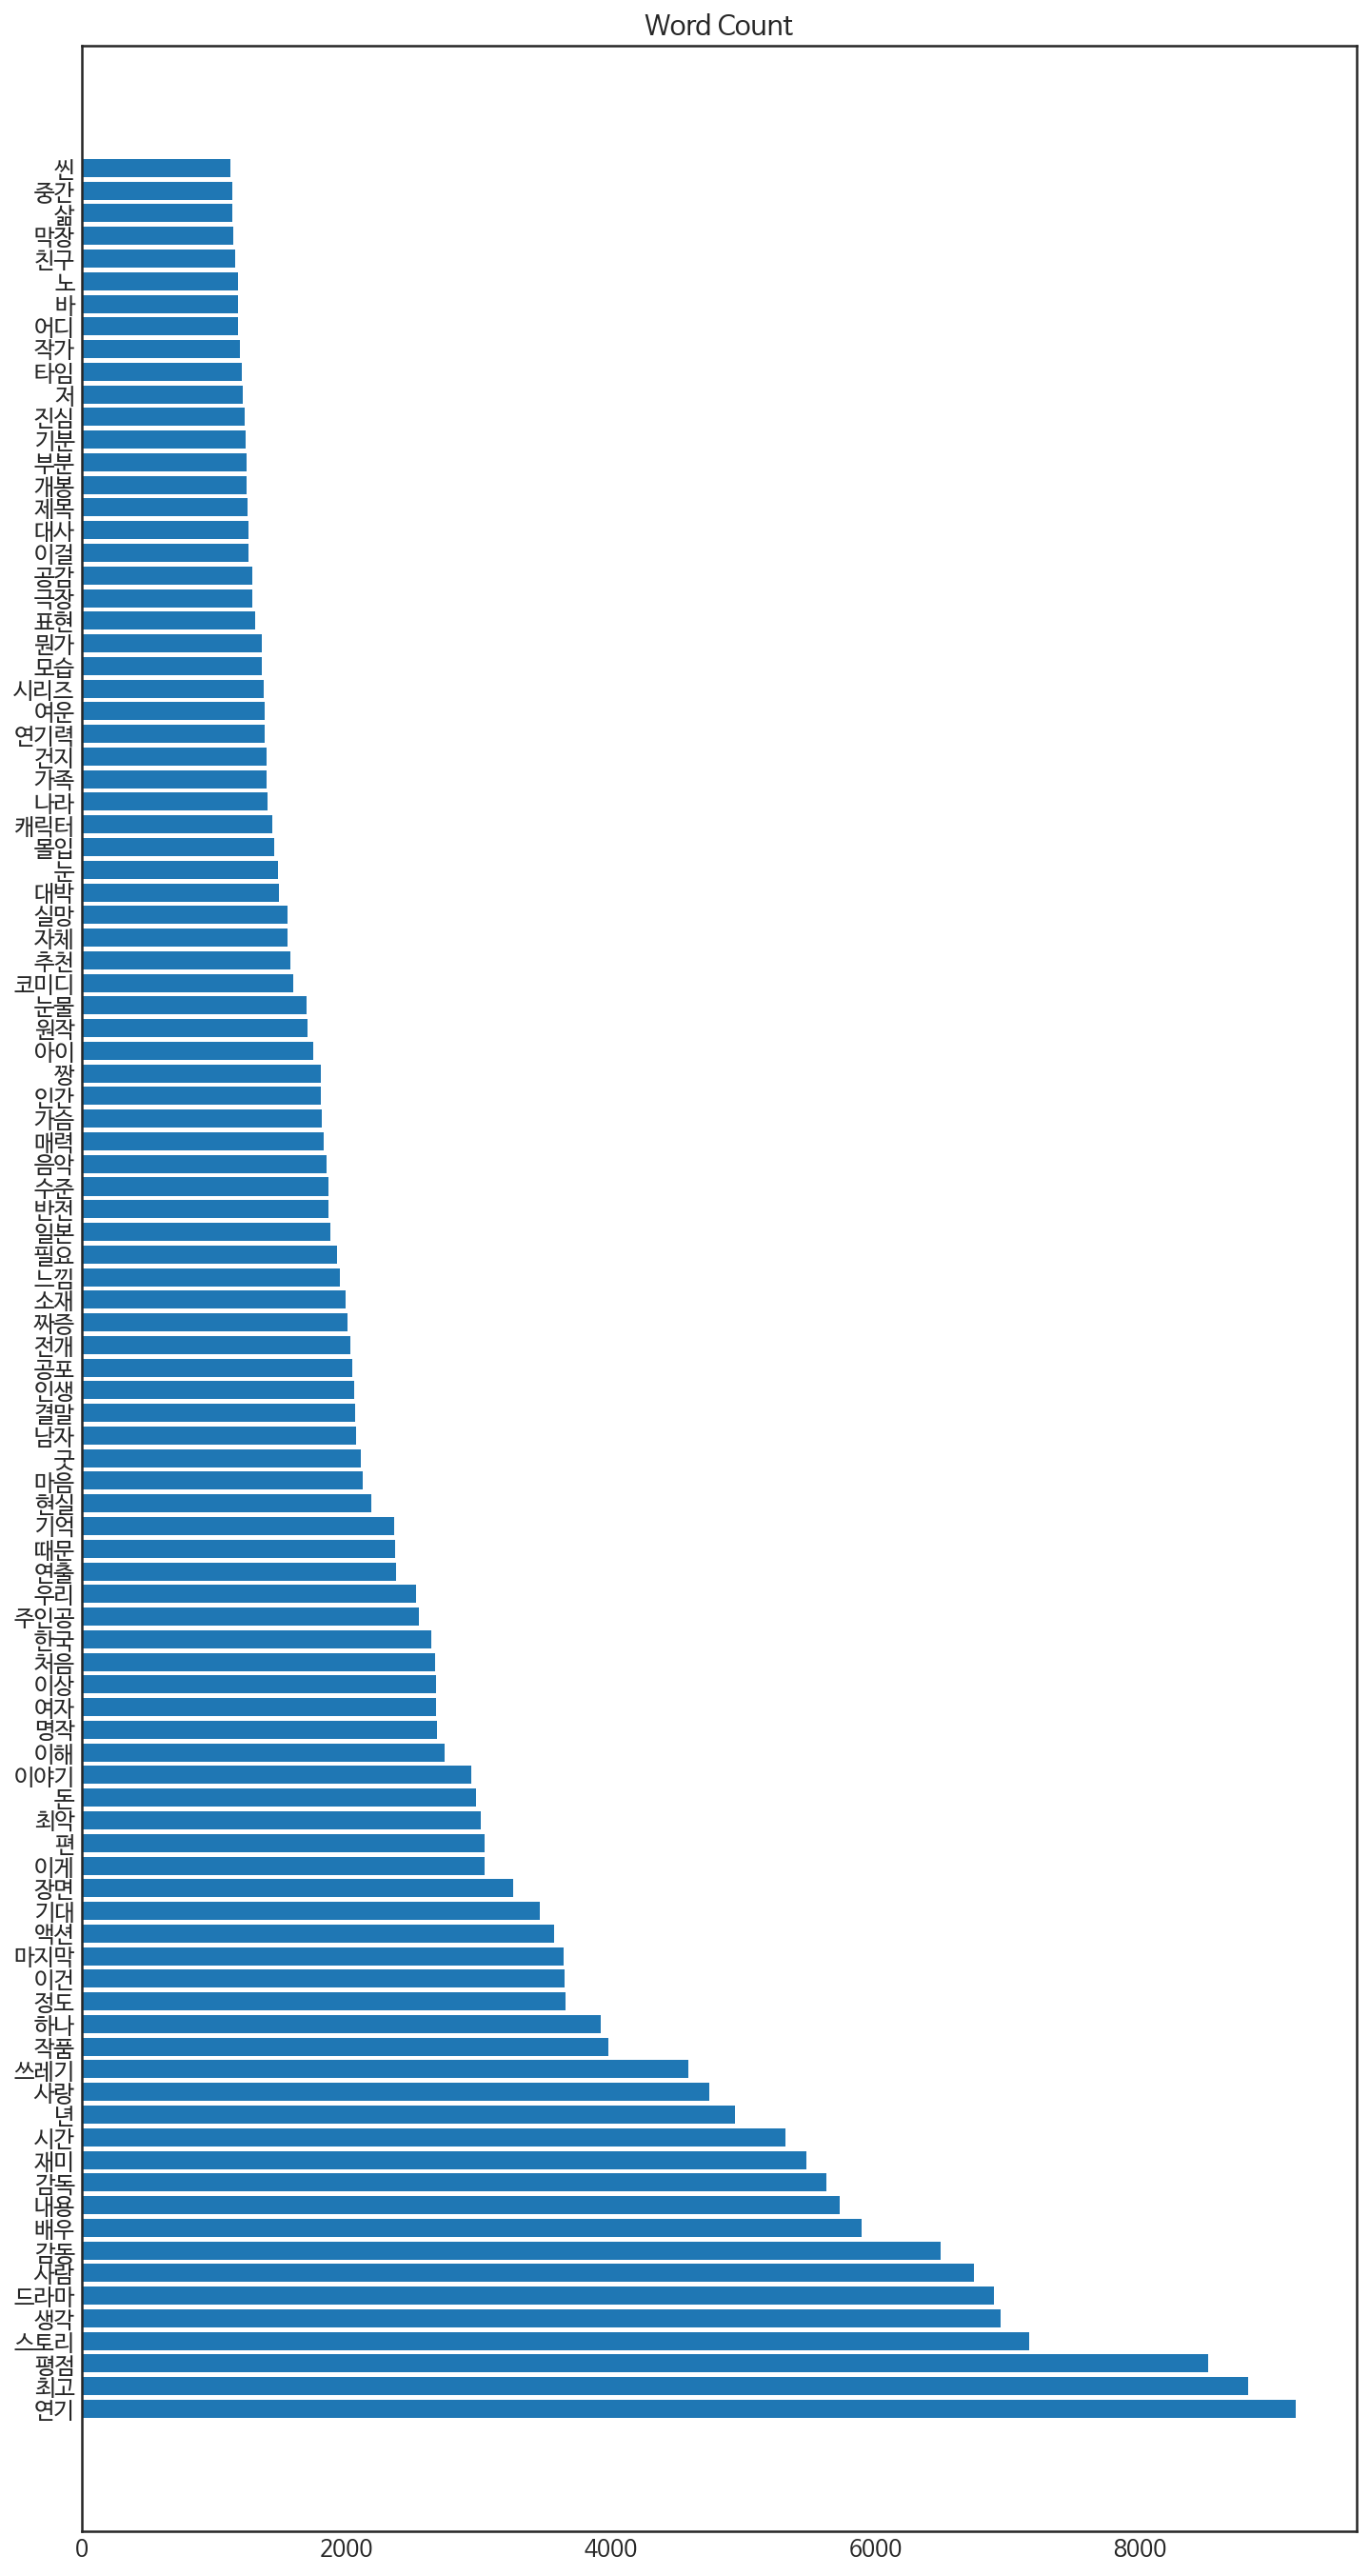

In [9]:
import numpy as np

plt.rcParams["font.size"] = 12

y_pos = np.arange(len(top_reviews_nouns))

plt.figure(figsize=(12, 24))
plt.barh(y_pos, top_reviews_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_reviews_nouns.keys())
plt.show()

### 트리맵(Treemap) 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [10]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


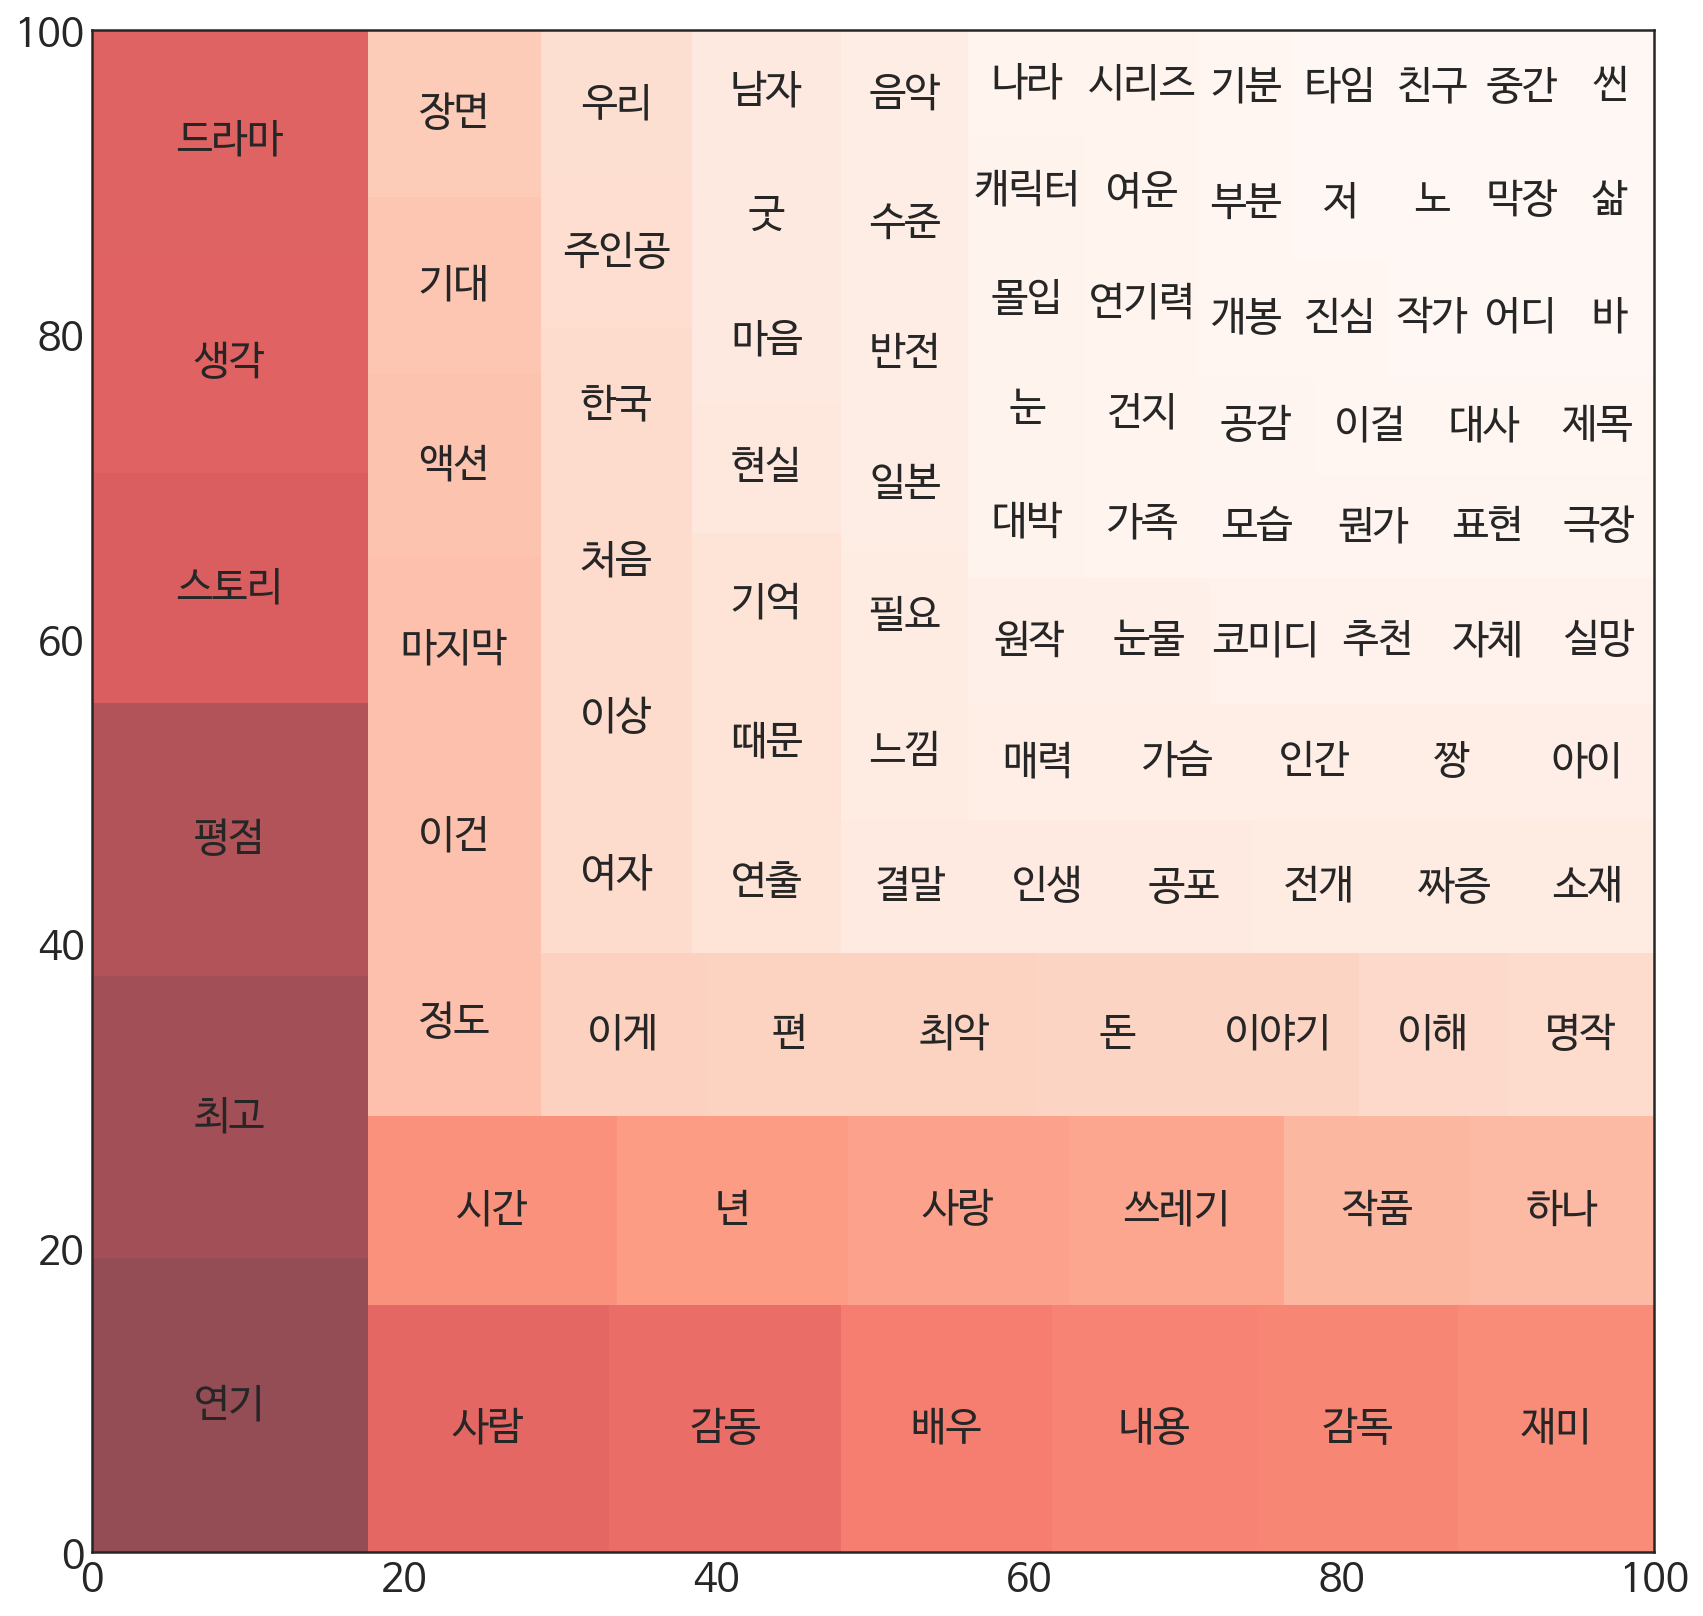

In [11]:
import squarify

plt.rcParams["figure.figsize"] = (14, 14)
plt.rcParams["font.size"] = 20

norm = mpl.colors.Normalize(vmin=min(top_reviews_nouns.values()),
                            vmax=max(top_reviews_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_reviews_nouns.values()]

squarify.plot(label=top_reviews_nouns.keys(),
              sizes=top_reviews_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드(WordCloud) 시각화

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 "한계가 있음"

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [12]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [13]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", font_path="./font/NanumBarunGothic.ttf")
wc.generate_from_frequencies(top_reviews_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

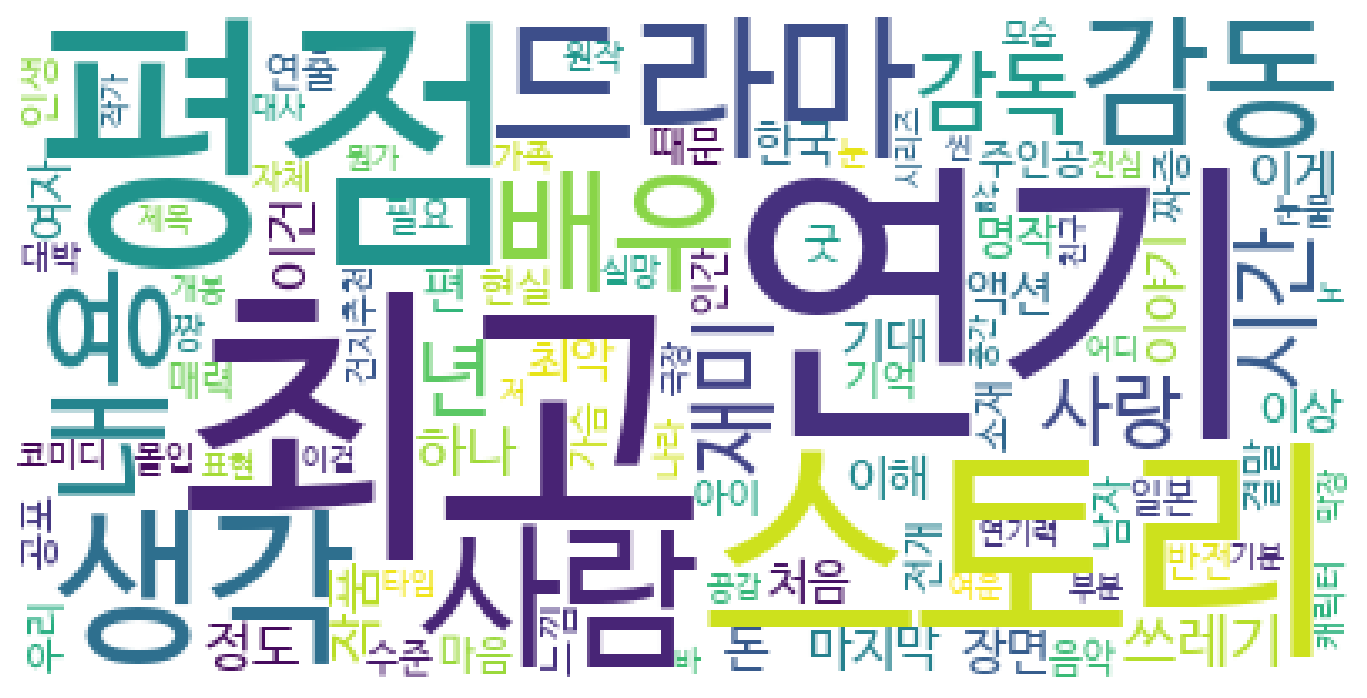

In [14]:
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
plt.show()

## 네이버 검색 API 서비스

### 네이버 서비스 API 신청

1. 네이버 개발자센터: https://developers.naver.com/
2. 어플리케이션 등록
3. 클라이언트 ID/SECRET 확인

### NAVER 서비스 API 종류

| 항목 | 주소                                         |
|------|----------------------------------------------|
|블로그| https://openapi.naver.com/v1/search/blog.json |
|뉴스　| https://openapi.naver.com/v1/search/news.json |
| 책　 | https://openapi.naver.com/v1/search/book.json|
| 성인 검색어 판별|　https://openapi.naver.com/v1/search/adult.json|
| 백과사전| https://openapi.naver.com/v1/search/encyc.json|
| 영화| https://openapi.naver.com/v1/search/movie.json|
| 카페글 |https://openapi.naver.com/v1/search/cafearticle.json|
| 지식in| https://openapi.naver.com/v1/search/kin.json|
| 지역 | https://openapi.naver.com/v1/search/local.json|
| 오타변환 | https://openapi.naver.com/v1/search/errata.json|
| 웹문서 | https://openapi.naver.com/v1/search/webkr.json|
| 이미지 | https://openapi.naver.com/v1/search/image.json|
| 쇼핑 | https://openapi.naver.com/v1/search/shop.json|
| 전문자료 | https://openapi.naver.com/v1/search/doc.json|

## 네이버 웹문서 키워드 분석

### 네이버 웹문서 검색 API

In [15]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = "bhEzZlMlPQ8HSN2j0U0I"
client_secret = "wVQjAB7YVm"

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=("Title", "Link", "Description"))

for start_index in range(start, end, display):

  url = "https://openapi.naver.com/v1/search/webkr?query=" + query \
        + "&display=" + str(display) + "&start=" + str(start_index)

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode == 200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode("utf-8"))
    items = response_dict["items"]
    for item_index in range(0, len(items)):
      remove_tag = re.compile("<.*?>")
      title = re.sub(remove_tag, "", items[item_index]["title"])
      link = items[item_index]["link"]
      description = re.sub(remove_tag, "", items[item_index]["description"])
      web_df.loc[idx] = [title, link, description]
      idx += 1
  else:
    print("Error Code: " + rescode)

web_df

검색 질의: 인공지능


,Title,Link,Description
0,인공지능 - 나무위키,https://namu.wiki/w/%EC%9D%B8%EA%B3%B5%EC%A7%8...,인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 일...
1,인공지능 - 해시넷,http://wiki.hash.kr/index.php/%EC%9D%B8%EA%B3%...,"인공지능(AI) 인공지능(人工知能, AI, artificial intelligenc..."
2,인공 지능(AI)이란? | 용어 해설 | HPE 대한민국,https://www.hpe.com/kr/ko/what-is/artificial-i...,AI(인공 지능)는 광범위하게 기계 또는 시스템이 하는 인간과 같은 모든 행동을 의...
3,인공지능의 정의와 활용 방안 | SAS KOREA,https://www.sas.com/ko_kr/insights/analytics/w...,"SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, ..."
4,인공 지능 | Dell Korea,https://www.dell.com/ko-kr/dt/solutions/artifi...,솔루션 인공 지능 인공 지능 솔루션 AI로 모든 위치에서 지능적인 성과를 더 빠르게...
...,...,...,...
145,인공지능 70 - YES24,http://www.yes24.com/Product/Goods/43864969,70가지 키워드로 알아보는 인공지능의 현재와 미래!알아두면 쓸데 있는 신비한 인공지...
146,#4 인공지능과 법- 인공지능 판사?,https://brunch.co.kr/@sonnykim/5,Artificial Intelligence and Law Story | 지난 글(#...
147,Askstory I 인공지능 I 소프트웨어 I 대한민국,https://www.askstorygroup.com/,Askstory는 독자 Autonomous Building에 필요한 인공지능 기반으...
148,인공 지능(AI) | CyberRes,https://www.microfocus.com/ko-kr/cyberres/ai,인공 지능 사이버 보안 솔루션은 사람의 지능과 기계의 지능을 결합하여 향상된 방어 ...


In [16]:
web = []

for d in web_df.Description:
  web.append(d)

print(web[:5])

['인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 일반적으로 인간의 학습능력, 추론능력, 지각능력이 필요한 작업을 할 수 있도록 컴퓨터시스템을 구현하려는 컴퓨터과학의 세부분야 중 하나이다. 인간을 포함한 동물이 갖고 있는 지능 즉, natural intelligence와는 다른 개념이다.', '인공지능(AI) 인공지능(人工知能, AI, artificial intelligence)이란 인간처럼 학습하고 생각할 수 있는 컴퓨터 시스템을 말한다.', 'AI(인공 지능)는 광범위하게 기계 또는 시스템이 하는 인간과 같은 모든 행동을 의미합니다. AI의 기본 형식에서 컴퓨터는 과거의 유사한 행동 사례를 통해 얻은 광범위한 데이터를 사용하여 인간의 행동을 ‘모방’하도록 프로그래밍됩니다. | HPE 대한민국', 'SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, AI의 역사와 활용 방법에 대해서 알아 보실 수 있습니다.', '솔루션 인공 지능 인공 지능 솔루션 AI로 모든 위치에서 지능적인 성과를 더 빠르게 달성하십시오. 비디오 보기 브로셔 보기 Intel Innovation Built-in AI 가능성에서 AI 검증으로 전환. 현재 AI 여정... ']


### 형태소 분석을 이용한 명사 추출


#### 불용어 사전

불용어 예제: `인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번`

In [17]:
stop_words = "인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번"
stop_words = stop_words.split(" ")
print(stop_words)

['인공지능', '인공', '지능', '분야', '수', '것', '등', '기반', '일', '년', '말', '문', '월', '이', '명', '깨', '개', '중', '범', '부', '딥', '빅', '책', '분', '봉', '차', '나', '내', '전', '억', '대', '형', '선', '사', '폼', '원', '번']


In [18]:
tagger = Mecab()
web_nouns = []
for w in web:
  for noun in tagger.nouns(w):
    if noun not in stop_words:
      web_nouns.append(noun)

web_nouns[:10]

['人工', '知能', '일반', '인간', '학습', '능력', '추론', '능력', '지각', '능력']

### 단어 빈도수 측정

In [19]:
web_nouns_counter = Counter(web_nouns)
top_web_nouns = dict(web_nouns_counter.most_common(100))
top_web_nouns

{'기술': 42,
 '인간': 34,
 '러닝': 27,
 '학습': 23,
 '활용': 21,
 '컴퓨터': 19,
 '데이터': 19,
 '방법': 18,
 '지식': 16,
 '시스템': 15,
 '서비스': 15,
 '머신': 15,
 '기업': 15,
 '제품': 15,
 '소개': 15,
 '과학': 14,
 '개념': 14,
 '개발': 14,
 '기계': 13,
 '솔루션': 13,
 '우리': 13,
 '구글': 13,
 '연구': 13,
 '의료': 13,
 '국내': 12,
 '지원': 12,
 '뇌': 12,
 '산업': 12,
 '관련': 12,
 '수업': 12,
 '미래': 11,
 '문제': 11,
 '기초': 11,
 '제공': 10,
 '발전': 10,
 '사람': 10,
 '상품': 10,
 '능력': 9,
 '필요': 9,
 '챗': 9,
 '분석': 9,
 '실습': 9,
 '추론': 8,
 '생각': 8,
 '기본': 8,
 '가능': 8,
 '확인': 8,
 '이해': 8,
 '소프트웨어': 8,
 '진화': 8,
 '인식': 8,
 '교육': 8,
 '처리': 8,
 '자료': 8,
 '콘텐츠': 8,
 '테크': 8,
 '수학': 8,
 '역사': 7,
 '상승': 7,
 '법': 7,
 '언어': 7,
 '소프트': 7,
 '융합': 7,
 '시장': 7,
 '사고': 7,
 '정보': 7,
 '자동': 7,
 '영역': 7,
 '경험': 7,
 '교사': 7,
 '무엇': 7,
 '윈도우': 7,
 '의미': 6,
 '사용': 6,
 '로봇': 6,
 '상담': 6,
 '가지': 6,
 '표현': 6,
 '때': 6,
 '봇': 6,
 '대학교': 6,
 '센터': 6,
 '교수': 6,
 '영상': 6,
 '과정': 6,
 '구축': 6,
 '해결': 6,
 '이론': 6,
 '학과': 6,
 '삼성전자': 6,
 '원리': 6,
 '번호': 6,
 '만': 6,
 '접근': 6,
 '보강': 6,
 '장':

### 단어 빈도 시각화

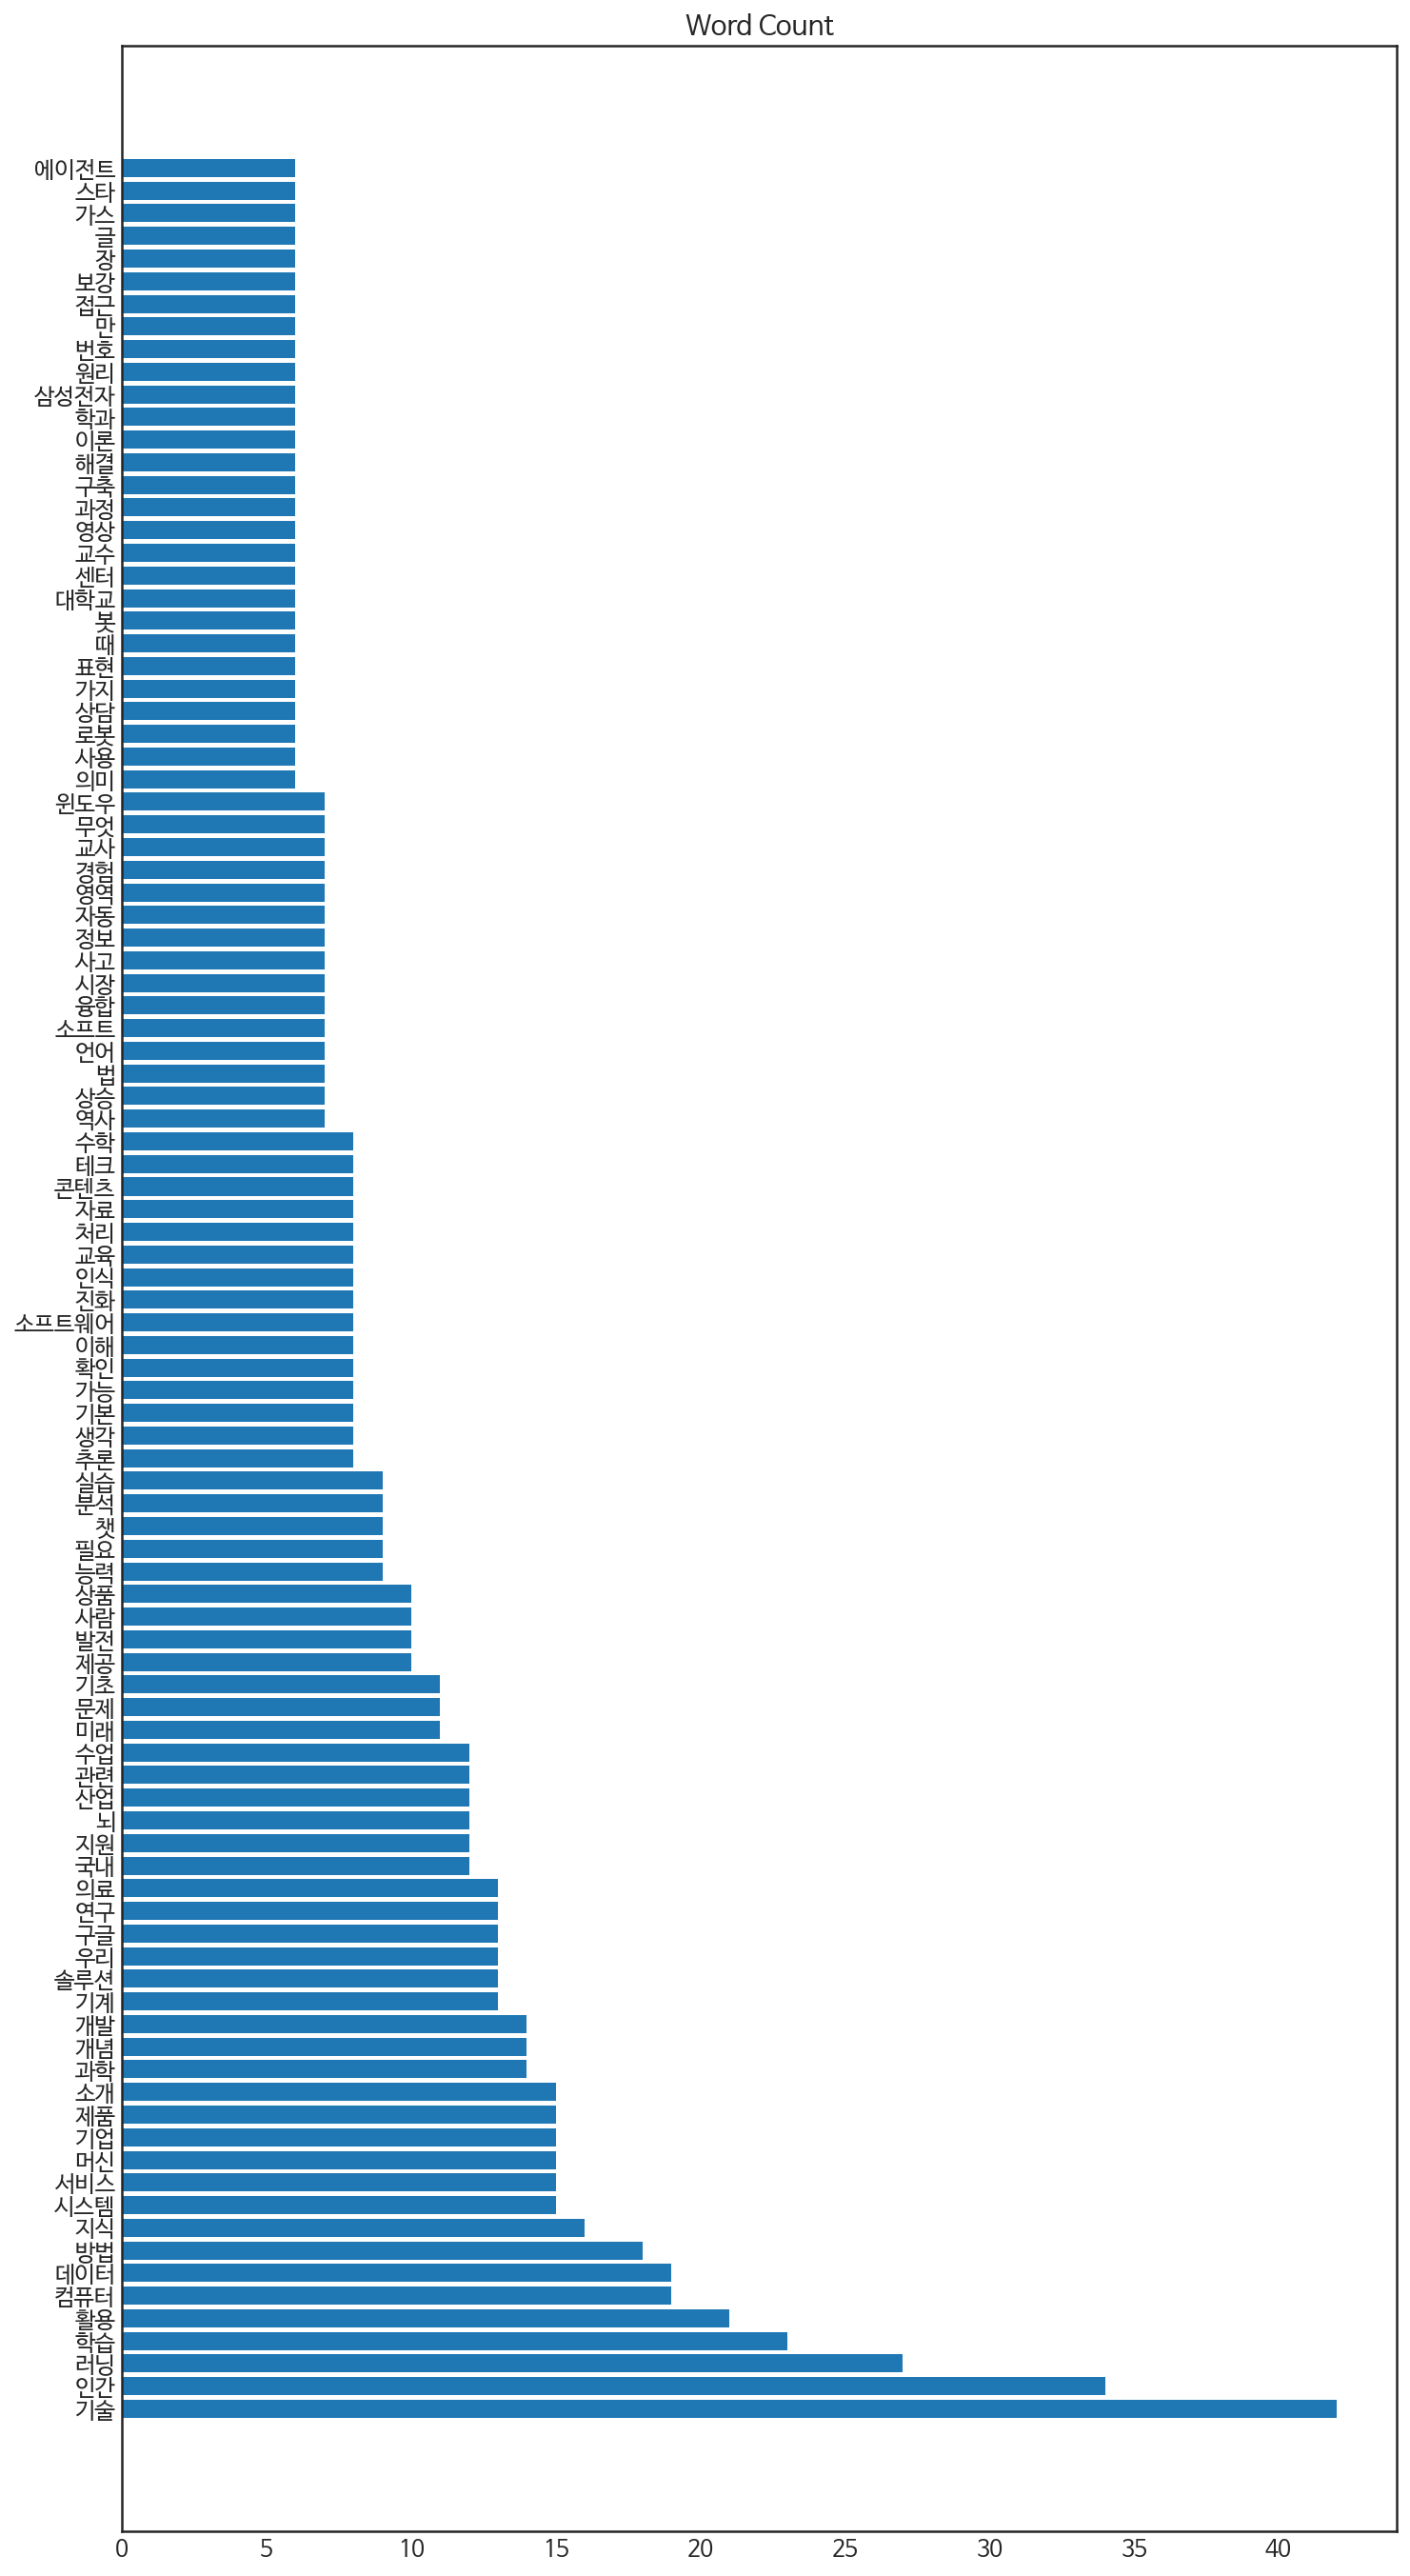

In [20]:
plt.rcParams["font.size"] = 12

y_pos = np.arange(len(top_web_nouns))

plt.figure(figsize=(12, 24))
plt.barh(y_pos, top_web_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_web_nouns.keys())
plt.show()

### 트리맵 시각화

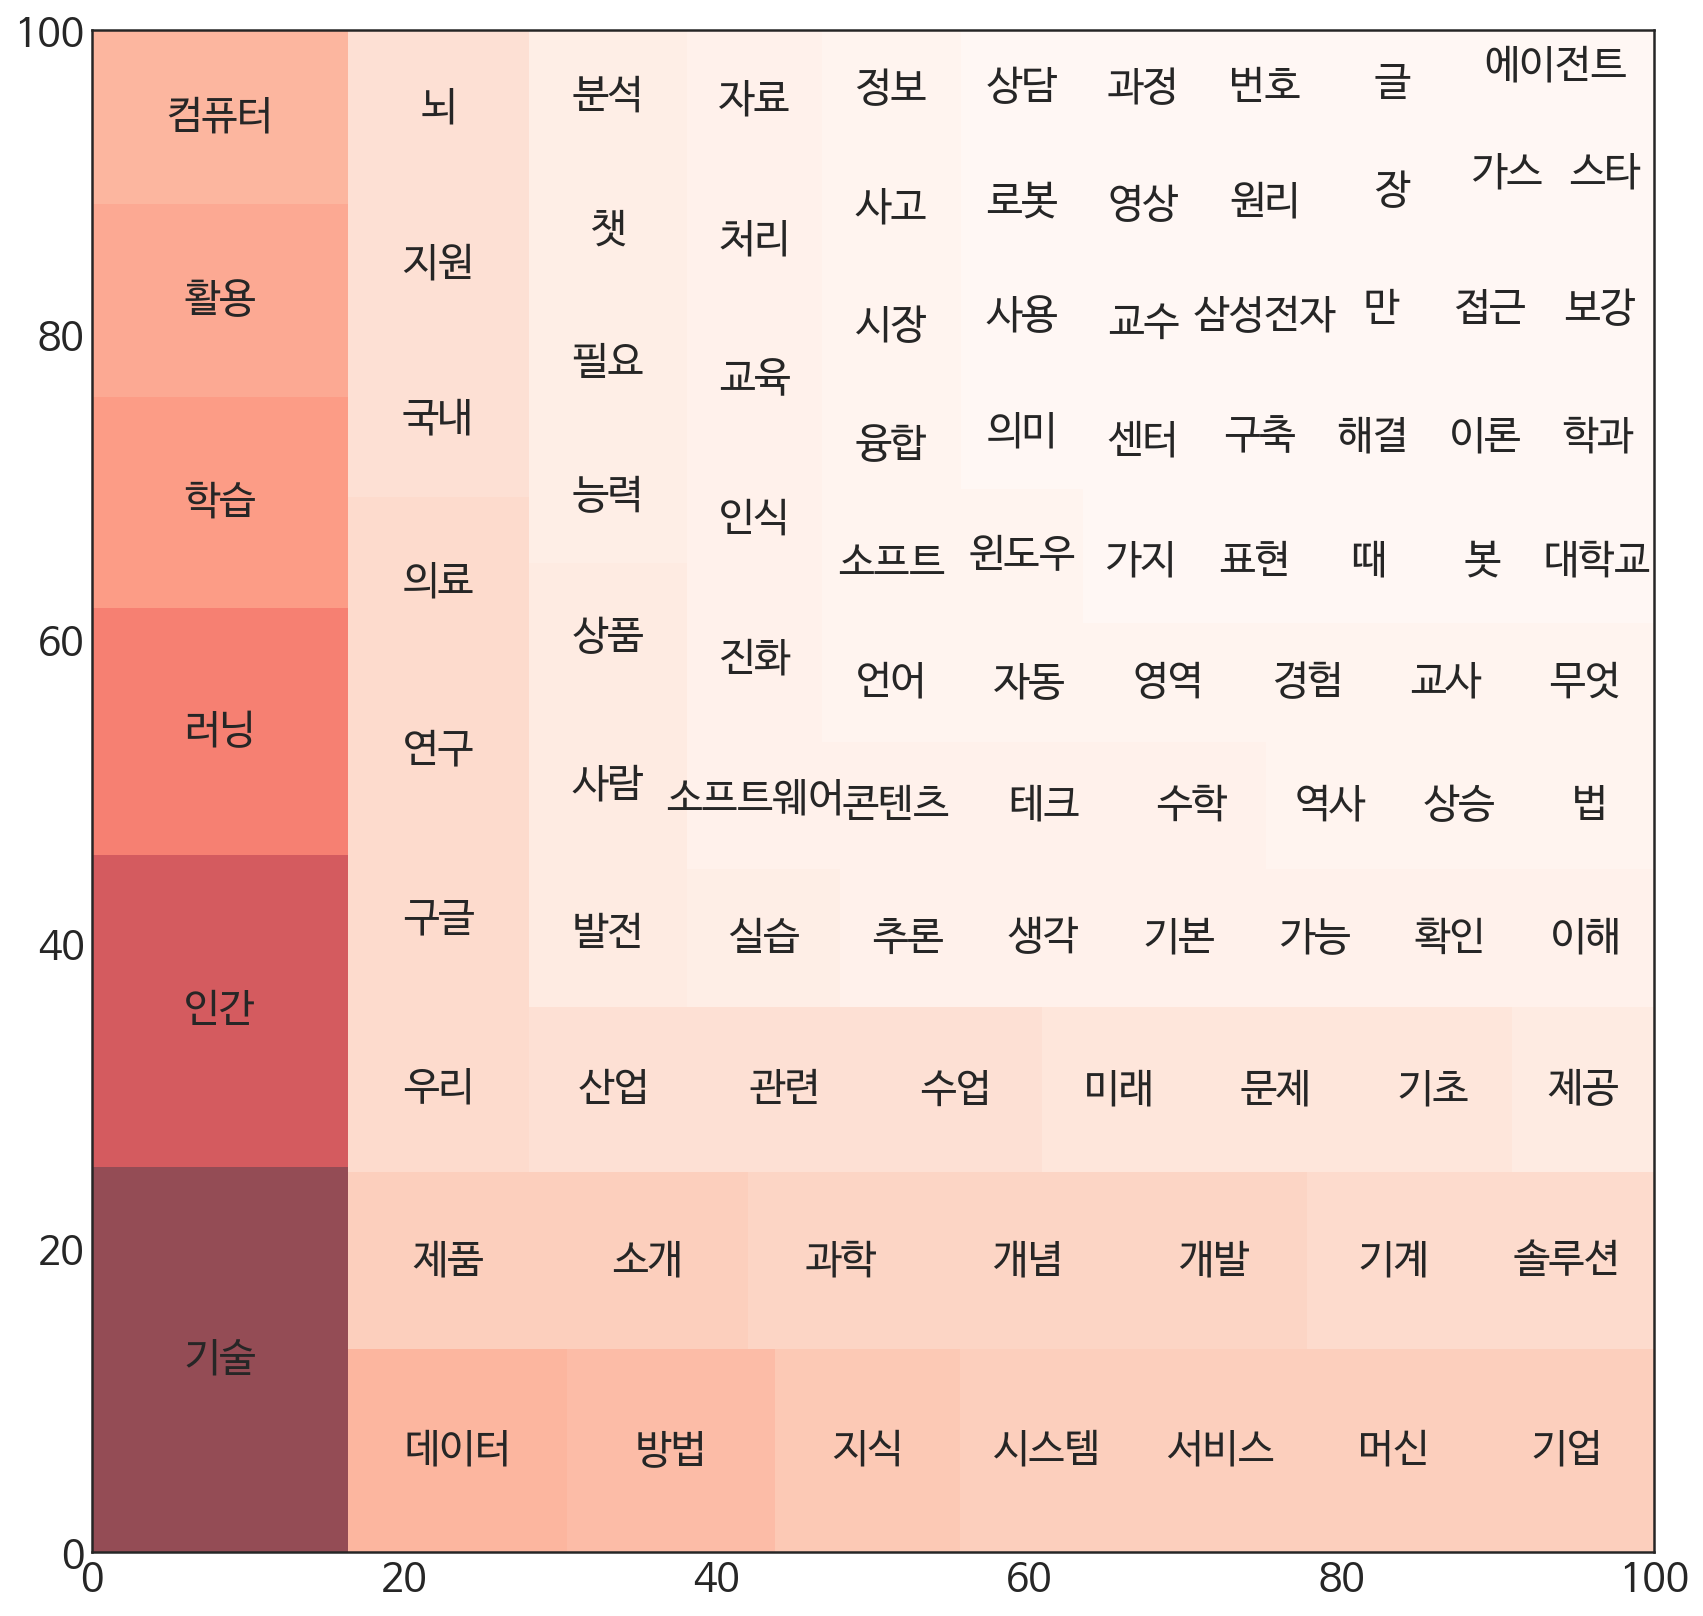

In [21]:
plt.rcParams["figure.figsize"] = (14, 14)
plt.rcParams["font.size"] = 20

norm = mpl.colors.Normalize(vmin=min(top_web_nouns.values()),
                            vmax=max(top_web_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_web_nouns.values()]

squarify.plot(label=top_web_nouns.keys(),
              sizes=top_web_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

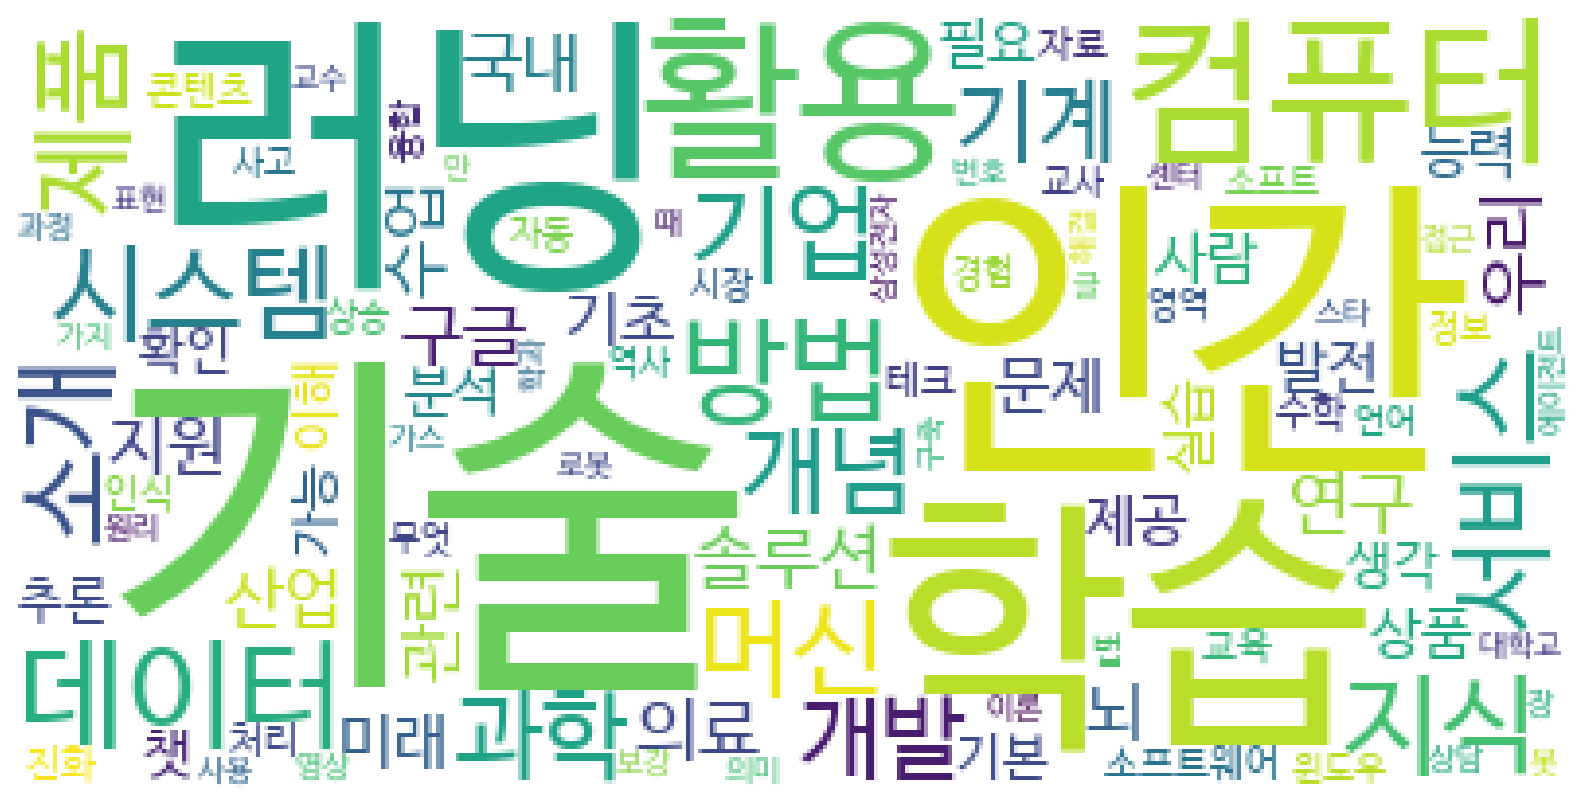

In [23]:
wc = WordCloud(background_color="white", font_path="./font/NanumBarunGothic.ttf")
wc.generate_from_frequencies(top_web_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
plt.show()

## 네이버 뉴스 키워드 분석

### 네이버 뉴스 검색 API

In [24]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = "bhEzZlMlPQ8HSN2j0U0I"
client_secret = "wVQjAB7YVm"

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

news_df = pd.DataFrame(columns=("Title", "Original Link", "Link", "Description", "Publication Date"))

for start_index in range(start, end, display):

  url = "https://openapi.naver.com/v1/search/news?query=" + query \
        + "&display=" + str(display) + "&start=" + str(start_index) + "&sort" + sort

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode == 200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode("utf-8"))
    items = response_dict["items"]
    for item_index in range(0, len(items)):
      remove_tag = re.compile("<.*?>")
      title = re.sub(remove_tag, "", items[item_index]["title"])
      original_link = items[item_index]["originallink"]
      link = items[item_index]["link"]
      description = re.sub(remove_tag, "", items[item_index]["description"])
      pub_date = items[item_index]["pubDate"]
      news_df.loc[idx] = [title, original_link, link, description, pub_date]
      idx += 1
  else:
    print("Error Code: " + rescode)

news_df

검색 질의: 인공지능


,Title,Original Link,Link,Description,Publication Date
0,2030 직장인은 인공지능(AI) 열공 중?...챗GPT 적용에 업무 생산성↑,https://www.codingworldnews.com/news/articleVi...,https://www.codingworldnews.com/news/articleVi...,화제의 중심이 된 &apos;챗GPT&apos;와 같은 인공지능(AI) 기술을 공부...,"Mon, 06 Feb 2023 01:48:00 +0900"
1,"경상국립대, &apos;SW·AI가 변화시킬 미래 교육&apos; 주제로 학부모 특...",https://www.codingworldnews.com/news/articleVi...,https://www.codingworldnews.com/news/articleVi...,경상국립대학교 교육혁신처는 10일 오전 KB인재니움사천에서 &apos;소프트웨어·인...,"Mon, 06 Feb 2023 01:42:00 +0900"
2,"KT-서울교육청, 특성화고 중심 &apos;청소년 AI 인재양성&apos; 맞손",https://www.codingworldnews.com/news/articleVi...,https://www.codingworldnews.com/news/articleVi...,KT는 서울 지역 인공지능(AI) 고등학교에 ▲자사 AI 능력시험인 &apos;AI...,"Mon, 06 Feb 2023 01:34:00 +0900"
3,"손보재팬, 인공지능 활용하는 디지털 전환 추진",http://www.insnews.co.kr/design_php/news_view....,http://www.insnews.co.kr/design_php/news_view....,AI·손보 車 스마트·손보 건물 스마트 견적 서비스 “사람과 디지털 연계 통한 서비...,"Mon, 06 Feb 2023 01:30:00 +0900"
4,"포항테크노파크, ICT이노베이션스퀘어확산사업 3년 연속 인센티브 확보",http://www.segye.com/content/html/2023/02/05/2...,https://n.news.naver.com/mnews/article/022/000...,포항테크노파크에 따르면 ‘ICT이노베이션스퀘어확산사업’은 과학기술정보통신부와 정보통...,"Mon, 06 Feb 2023 01:03:00 +0900"
...,...,...,...,...,...
995,"진천교육도서관, 6일부터 &apos;기초 코딩&apos; 겨울 방학특강",http://www.jbnews.com/news/articleView.html?id...,http://www.jbnews.com/news/articleView.html?id...,김민수 관장은 &quot;이번 방학특강을 통해서 학생들이 코딩과 친해지고 자신의 꿈...,"Fri, 03 Feb 2023 15:28:00 +0900"
996,"인공지능 메타버스 시대 미래전략, 명품도서 인증 대상 수상",https://www.etnews.com/20230203000157,https://n.news.naver.com/mnews/article/030/000...,국제미래학회가 출간한 &apos;인공지능 메타버스 시대 미래전략&apos;이 대한민...,"Fri, 03 Feb 2023 15:26:00 +0900"
997,[오전 주요 국제금융뉴스] (3일),http://news.einfomax.co.kr/news/articleView.ht...,http://news.einfomax.co.kr/news/articleView.ht...,https://news.einfomax.co.kr/news/articleView.h...,"Fri, 03 Feb 2023 15:26:00 +0900"
998,"&apos;시리&apos; 개발의 주역 김윤 박사, 닷 사외이사로 영입",https://www.onews.tv/news/articleView.html?idx...,https://www.onews.tv/news/articleView.html?idx...,김 박사는 2004년 영국 음성인식 스타트업인 노바리스의 최고경영자(CEO) 자리에...,"Fri, 03 Feb 2023 15:24:00 +0900"


In [25]:
news = []
for n in news_df.Title:
  news.append(n)

print(news[:5])

['2030 직장인은 인공지능(AI) 열공 중?...챗GPT 적용에 업무 생산성↑', '경상국립대, &apos;SW·AI가 변화시킬 미래 교육&apos; 주제로 학부모 특강 예정', 'KT-서울교육청, 특성화고 중심 &apos;청소년 AI 인재양성&apos; 맞손', '손보재팬, 인공지능 활용하는 디지털 전환 추진', '포항테크노파크, ICT이노베이션스퀘어확산사업 3년 연속 인센티브 확보']


### 형태소 분석을 이용한 명사 추출


In [28]:
tagger = Mecab()
news_nouns = []
for n in news:
  for noun in tagger.nouns(n):
    if noun not in stop_words:
      news_nouns.append(noun)

news_nouns[:10]

['직장인', '열공', '챗', '적용', '업무', '생산', '경상', '국립대', '변화', '미래']

### 단어 빈도수 측정

In [29]:
news_nouns_counter = Counter(news_nouns)
top_news_nouns = dict(news_nouns_counter.most_common(100))
top_news_nouns

{'챗': 183,
 '교육청': 76,
 '이승기': 73,
 '기부': 70,
 '서울시': 62,
 '육성': 53,
 '청소년': 51,
 '교육': 48,
 '인재': 48,
 '이스트': 48,
 '디지털': 43,
 '전문가': 42,
 '투자': 40,
 '구글': 37,
 '만': 37,
 '미래': 36,
 '네이버': 36,
 '발': 36,
 '전기금': 35,
 '양성': 34,
 '봇': 34,
 '사업': 31,
 '반도체': 31,
 '개발': 31,
 '주': 30,
 '기술': 29,
 '개인': 29,
 '출시': 28,
 '정보': 27,
 '기업': 26,
 '美': 24,
 '스마트': 23,
 '홍보': 23,
 '서울': 22,
 '랩': 22,
 '협력': 22,
 '시장': 22,
 '대사': 22,
 '시대': 21,
 '서치': 20,
 '맞손': 19,
 '활용': 19,
 '서비스': 19,
 '한국': 19,
 '혁신': 19,
 '주가': 18,
 '스타트업': 18,
 '관리': 18,
 '카메라': 18,
 '시인': 18,
 '업무': 17,
 '열풍': 17,
 '삼성': 17,
 '확장': 17,
 '갤럭시': 17,
 '이동한': 17,
 '등단': 17,
 '공모': 17,
 '대응': 16,
 '지원': 16,
 '확대': 16,
 '로봇': 16,
 '샌즈': 16,
 '가수': 16,
 '뉴욕': 16,
 '고학수': 15,
 '위': 15,
 '위원장': 15,
 '기사': 15,
 '상반기': 15,
 '검색': 15,
 '캠퍼스': 15,
 '韓': 14,
 '뉴스': 14,
 '잡지': 14,
 '시스템': 14,
 '핵': 14,
 '확정': 14,
 '씨': 13,
 '폭': 13,
 '한미': 13,
 '외교': 13,
 '北': 13,
 '박진': 13,
 '행보': 13,
 '민간': 13,
 '속': 13,
 '강화': 13,
 '메타': 13,
 '체계': 12,
 

### 단어 빈도 시각화

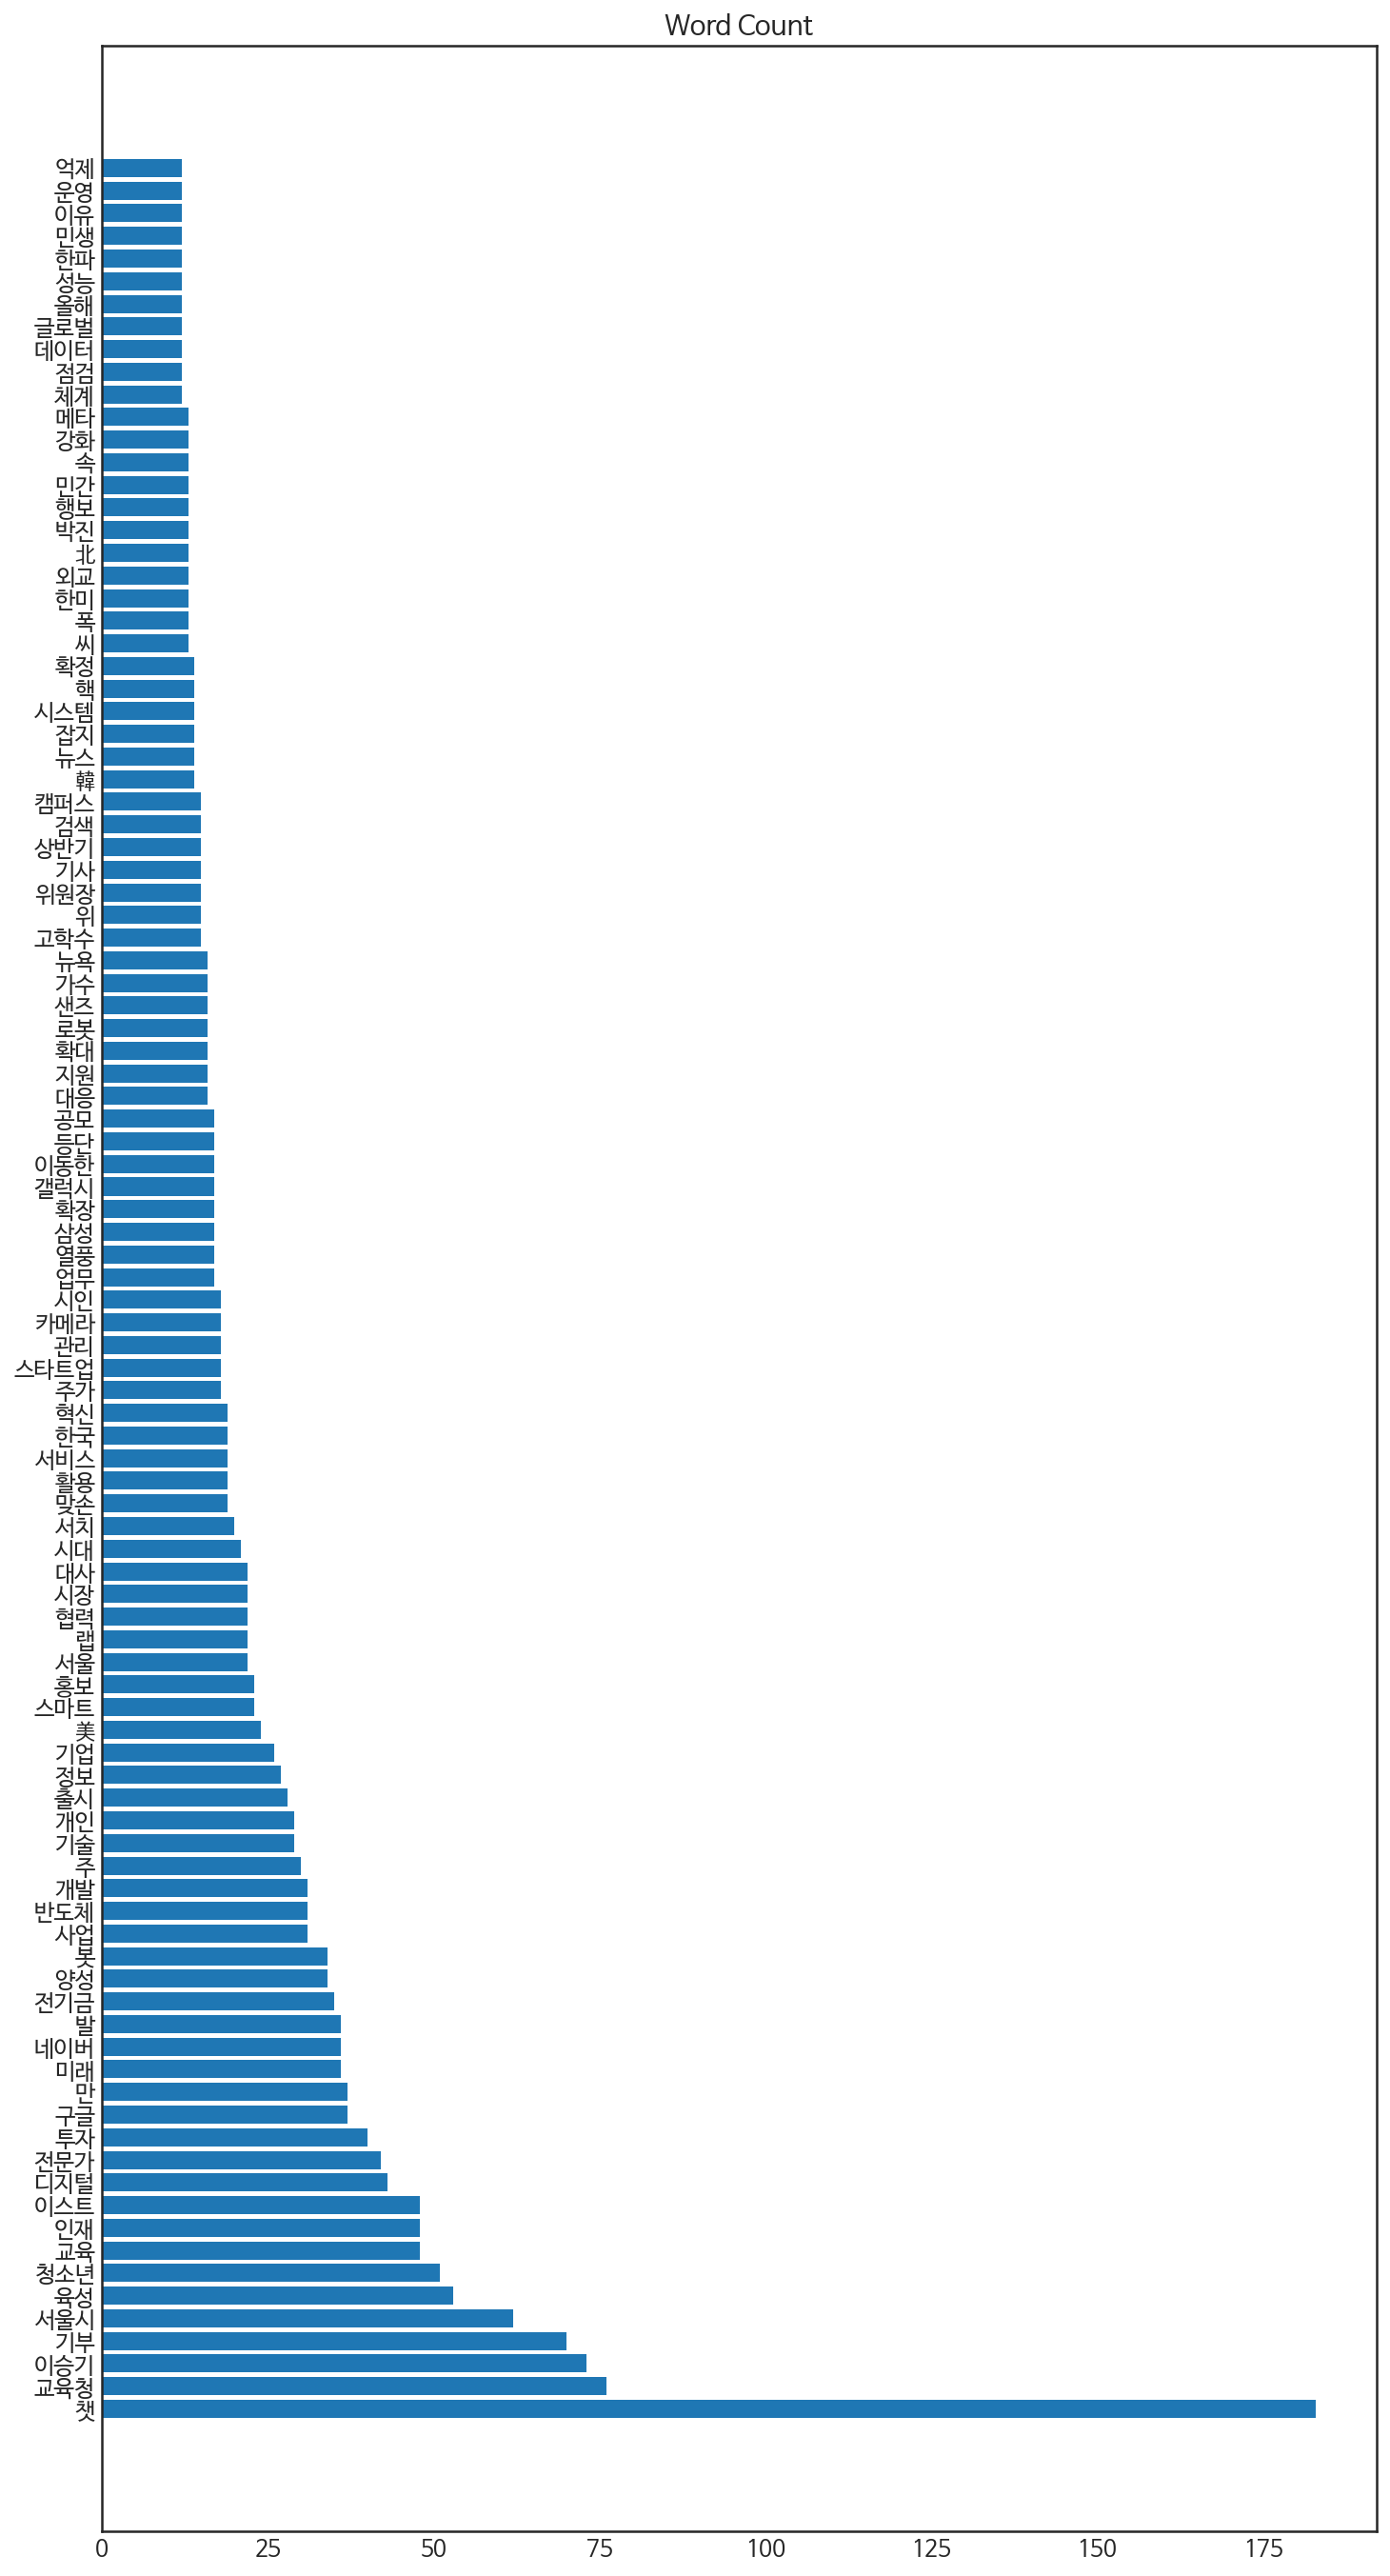

In [30]:
plt.rcParams["font.size"] = 12

y_pos = np.arange(len(top_news_nouns))

plt.figure(figsize=(12, 24))
plt.barh(y_pos, top_news_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_news_nouns.keys())
plt.show()

### 트리맵 시각화

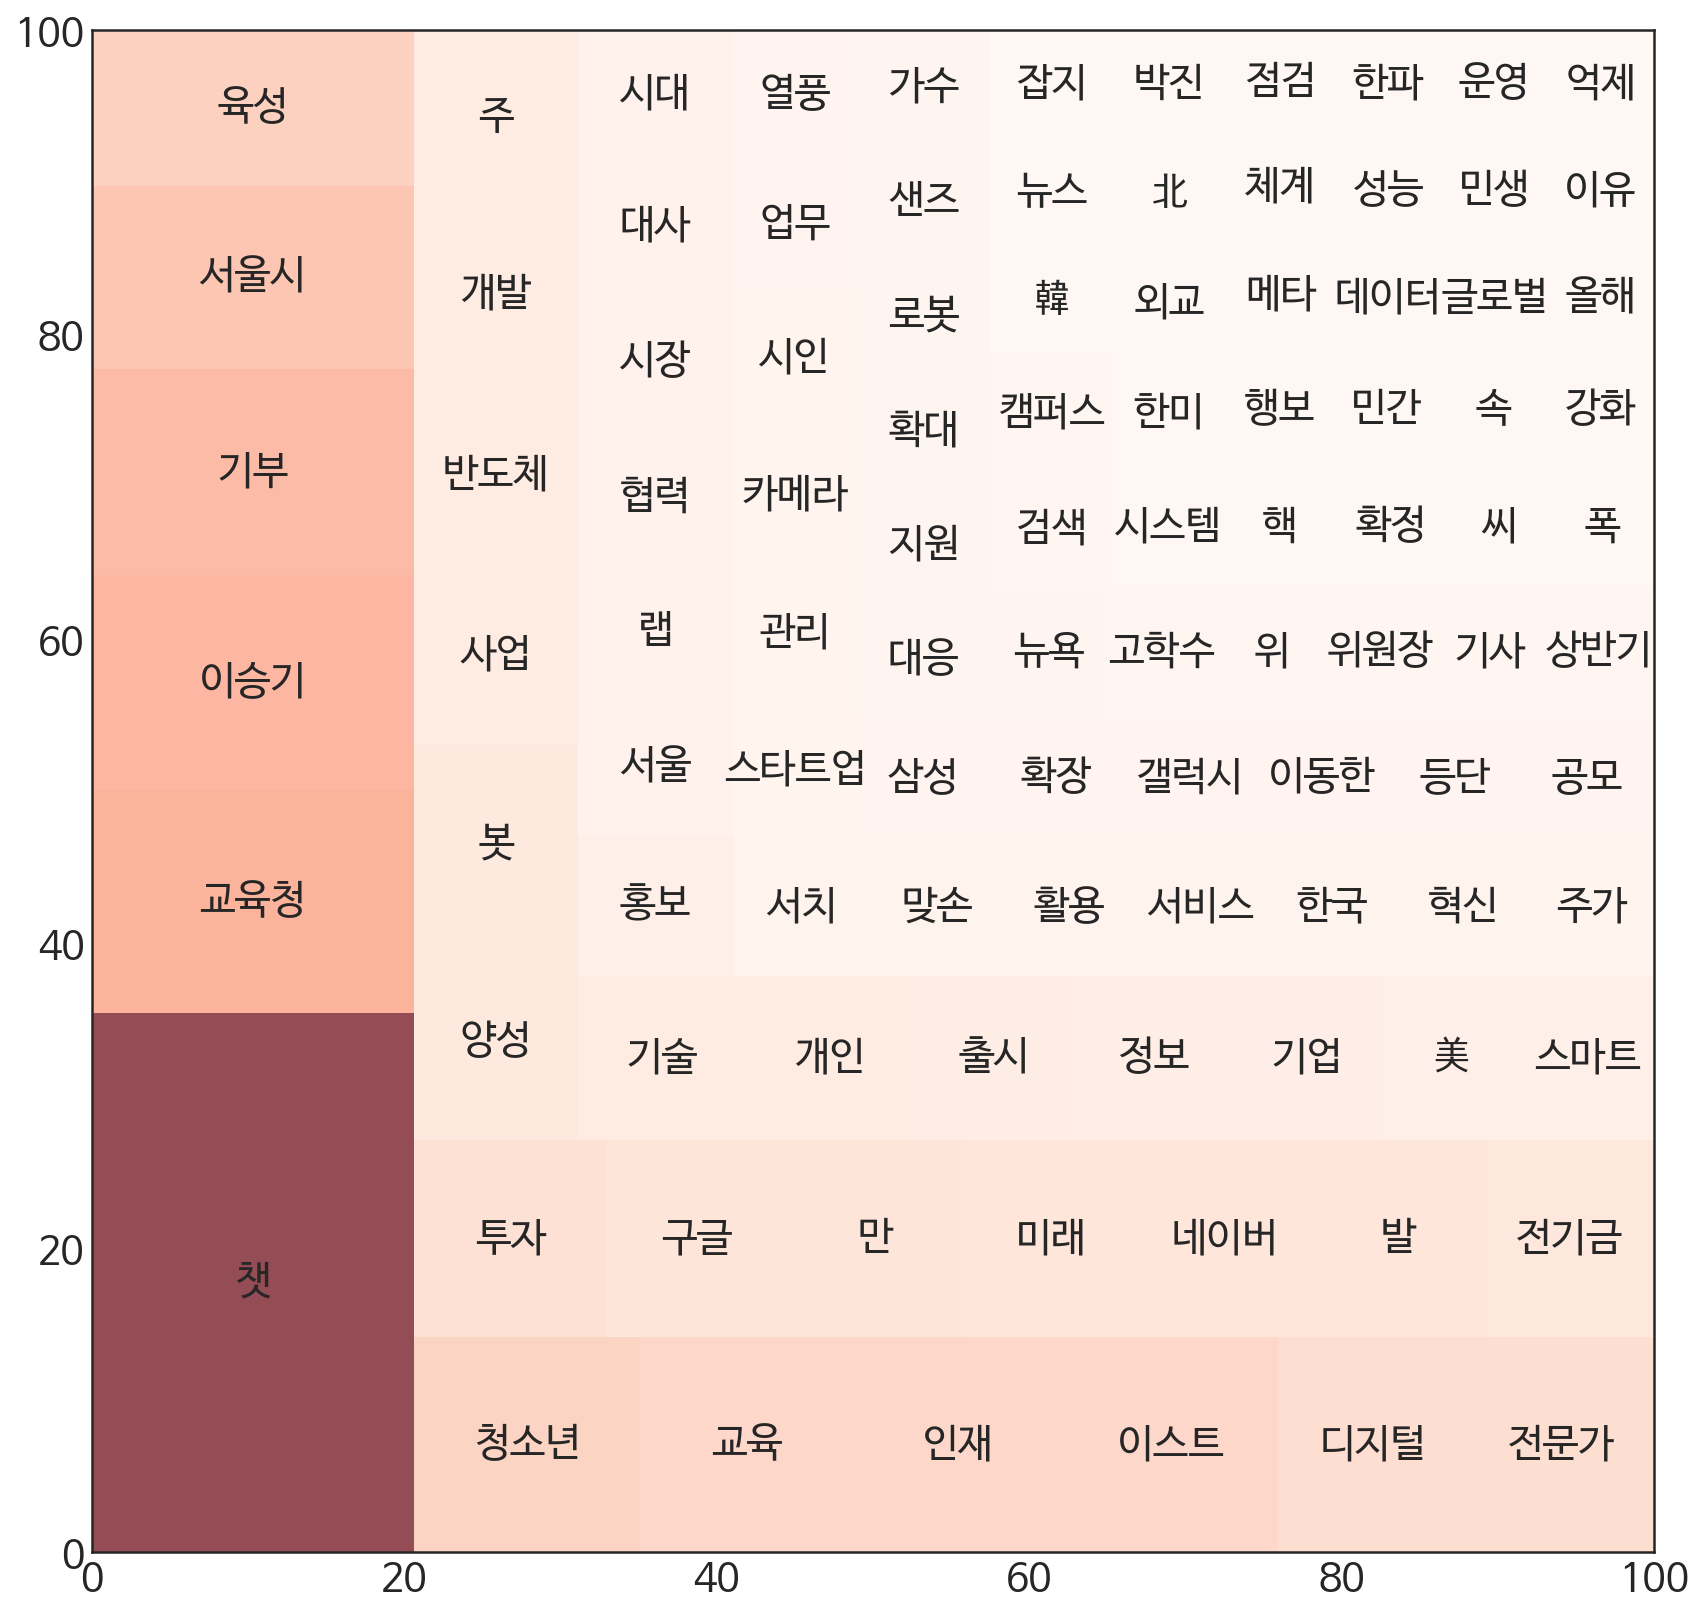

In [31]:
plt.rcParams["figure.figsize"] = (14, 14)
plt.rcParams["font.size"] = 20

norm = mpl.colors.Normalize(vmin=min(top_news_nouns.values()),
                            vmax=max(top_news_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_news_nouns.values()]

squarify.plot(label=top_news_nouns.keys(),
              sizes=top_news_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

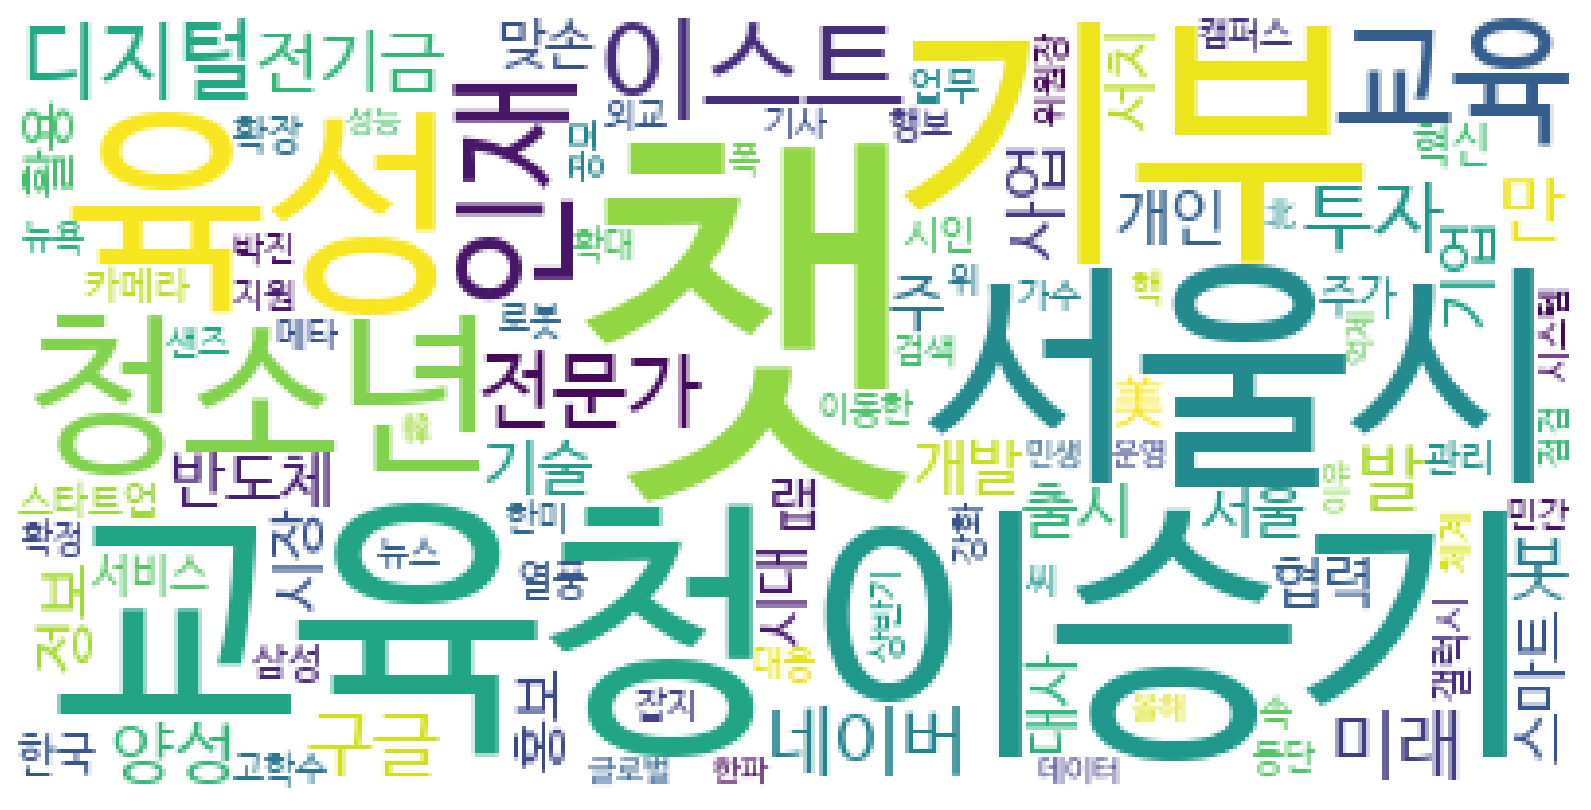

In [32]:
wc = WordCloud(background_color="white", font_path="./font/NanumBarunGothic.ttf")
wc.generate_from_frequencies(top_news_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
plt.show()

## 네이버 블로그 키워드 분석

### 네이버 블로그 검색 API

In [35]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = "bhEzZlMlPQ8HSN2j0U0I"
client_secret = "wVQjAB7YVm"

query = urllib.parse.quote(input("검색 질의: "))
idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

blog_df = pd.DataFrame(columns=("Title", "Link", "Description", "Blogger name", "Blogger Link"))

for start_index in range(start, end, display):

  url = "https://openapi.naver.com/v1/search/blog?query=" + query \
        + "&display=" + str(display) + "&start=" + str(start_index) + "&sort" + sort

  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id", client_id)
  request.add_header("X-Naver-Client-Secret", client_secret)
  response = urllib.request.urlopen(request)
  rescode = response.getcode()

  if(rescode == 200):
    response_body = response.read()
    response_dict = json.loads(response_body.decode("utf-8"))
    items = response_dict["items"]
    for item_index in range(0, len(items)):
      remove_tag = re.compile("<.*?>")
      title = re.sub(remove_tag, "", items[item_index]["title"])
      blogger_link = items[item_index]["bloggerlink"]
      link = items[item_index]["link"]
      description = re.sub(remove_tag, "", items[item_index]["description"])
      blogger_name = items[item_index]["bloggername"]
      blog_df.loc[idx] = [title, link, description, blogger_name, blogger_link]
      idx += 1
  else:
    print("Error Code: " + rescode)

blog_df

검색 질의: 인공지능


,Title,Link,Description,Blogger name,Blogger Link
0,인공지능로봇청소기 부모님도 칭찬하세요,https://blog.naver.com/s_teresa/222996004761,오히려 이렇게 쉬운데 무시하냐고 하셨네요… 과연 인공지능로봇청소기답게 지능적이지 않...,무얼할까?,blog.naver.com/s_teresa
1,LG 인공지능 리모컨 OLED48C1 TV용 구입 교체후기,https://blog.naver.com/dasoljun/223003637239,"LG 인공지능 리모컨이었는데, 따로 AS는 안되고 구입해야한다더라. 오프라인에서는 ...","다준아빠의 캠핑, IT",blog.naver.com/dasoljun
2,"AI 인공지능 ETF SRVR, CLOU, IROB (ft. 챗gpt 관련주...",https://blog.naver.com/couplesoap/222999333420,인공지능(AI)가 답변을 해주는 채팅 플랫폼이다. 지금까지 우리는 검색을 하면 키워...,리치양갱의 원하는대로 이루어지는 삶,blog.naver.com/couplesoap
3,인공지능교육 체계적인 과정과 국비지원까지,https://blog.naver.com/gns8159/223001725901,인공지능교육 체계적인 과정과 국비지원까지 다양한 IT기술 분야 중 전공과 나이를 불...,좋은,blog.naver.com/gns8159
4,사용법 변경 비교 후기(블루투스 스피커 연결 인공지능),https://blog.naver.com/yunbbu/223004541582,연결 인공지능) 본가에서 사용하던 오래된 셋톱박스가 점점 말썽을 부리고 있는 것 같...,nana :),blog.naver.com/yunbbu
...,...,...,...,...,...
995,마이크로소프트의 투자 인공지능 쳇-GPT 알아보기 ( 미래...,https://blog.naver.com/cmb1226/223000391086,안녕하세요 인공지능 AI에 관심이 많은 쉬운 경제 이야기입니다~~ © ClearCu...,쉬운 경제 이야기,blog.naver.com/cmb1226
996,"[동서대]‘AI KOREA 2022’서 인공지능 프로젝트, VR...",https://blog.naver.com/dongseo_uni/222892494562,"[SW중심대학사업단] ‘AI KOREA 2022’서 인공지능 프로젝트, VR, 빅데...",동서대학교 공식 블로그,blog.naver.com/dongseo_uni
997,인공지능 AI(전원일기),https://blog.naver.com/onnuri2412/222996941900,이렇게 할 수 있는 것은 딥 러닝(deep learning)과 가짜(fake)의 합...,어쩌다 귀촌이에요,blog.naver.com/onnuri2412
998,&lt;「(작곡 프로그램을 활용한) 인공지능 기술 감수성 교육」...,https://blog.naver.com/dibrary1004/222790486445,"살펴보고, 인공지능 작곡 프로그램을 직접 체험해 볼 수 있는 기회를 제공하니 많은 ...",국립중앙도서관 블로그,blog.naver.com/dibrary1004


In [36]:
blog = []
for b in blog_df.Description:
  blog.append(b)

print(blog[:5])

['오히려 이렇게 쉬운데 무시하냐고 하셨네요… 과연 인공지능로봇청소기답게 지능적이지 않습니까? 사람이 하는 것과 다름없다고 봅니다. 부모님도 어디서 효자 한 명 데려온 것 같다 하셨습니다. 진작에 사드릴... ', 'LG 인공지능 리모컨이었는데, 따로 AS는 안되고 구입해야한다더라. 오프라인에서는 LG 서비스센터에... LG 인공지능 리모컨 (MR21GC -AKB76036506) 혹시나 싶어서 미리 거실 LG TV에서 쓰던 구형 인공지능 리모컨을... ', '인공지능(AI)가 답변을 해주는 채팅 플랫폼이다. 지금까지 우리는 검색을 하면 키워드 중심으로... 그러나 이제는 자료를 찾아서 취합해 주는 역할을 인공지능이 대신하게 될 것이다. 인간은 아닌데... ', '인공지능교육 체계적인 과정과 국비지원까지 다양한 IT기술 분야 중 전공과 나이를 불문하고 많은 분들이 관심을 가지고 있는 것 중 하나가 인공지능이라고 하였습니다. 특히 몇 년 전까지만 해도 인공지능은... ', '연결 인공지능) 본가에서 사용하던 오래된 셋톱박스가 점점 말썽을 부리고 있는 것 같더라고요. 그래서 조금 더 편하게 사용해 보시라고 인공지능 셋톱박스로 설치해 드리려고 알아봤네요. 아무래도... ']


### 형태소 분석을 이용한 명사 추출


In [37]:
tagger = Mecab()
blog_nouns = []
for b in blog:
  for noun in tagger.nouns(b):
    if noun not in stop_words:
      blog_nouns.append(noun)

blog_nouns[:10]

['무시', '로봇', '청소기', '사람', '부모', '어디', '효자', '진작', '리모컨', '구입']

### 단어 빈도수 측정

In [38]:
blog_nouns_counter = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_counter.most_common(100))
top_blog_nouns

{'기술': 249,
 '데이터': 158,
 '교육': 144,
 '챗': 128,
 '인간': 126,
 '활용': 119,
 '로봇': 111,
 '관련': 108,
 '학습': 104,
 '사람': 101,
 '그림': 96,
 '봇': 95,
 '서비스': 94,
 '미래': 84,
 '개발': 83,
 '산업': 81,
 '사용': 78,
 '정보': 77,
 '시대': 74,
 '생각': 70,
 '발전': 66,
 '대화': 65,
 '러닝': 63,
 '기업': 63,
 '우리': 61,
 '학교': 58,
 '최근': 56,
 '소프트웨어': 55,
 '과학': 54,
 '코딩': 54,
 '보청기': 53,
 '진행': 51,
 '주': 50,
 '연구': 50,
 '과정': 48,
 '가능': 47,
 '프로그램': 47,
 '소개': 46,
 '디지털': 45,
 '투자': 43,
 '컴퓨터': 43,
 '분석': 43,
 '시스템': 42,
 '세상': 42,
 '내용': 42,
 '관심': 40,
 '기계': 39,
 '인식': 38,
 '이미지': 38,
 '이번': 38,
 '사회': 38,
 '수업': 37,
 '이용': 36,
 '시간': 36,
 '시작': 36,
 '오픈': 36,
 '광주': 36,
 '신경망': 36,
 '능력': 35,
 '자율': 34,
 '시장': 34,
 '때': 34,
 '이야기': 34,
 '글': 34,
 '기능': 33,
 '아이': 33,
 '모델': 33,
 '학생': 32,
 '주인공': 32,
 '지원': 31,
 '학과': 31,
 '메타': 31,
 '영상': 31,
 '대회': 31,
 '혁명': 30,
 '전문': 30,
 '스마트': 30,
 '운영': 29,
 '오늘': 29,
 '질문': 29,
 '자동': 28,
 '세계': 28,
 '직업': 28,
 '버스': 28,
 '문제': 28,
 '음성': 28,
 '대학원': 28,
 '하나': 27,
 '요즘': 27,

### 단어 빈도 시각화

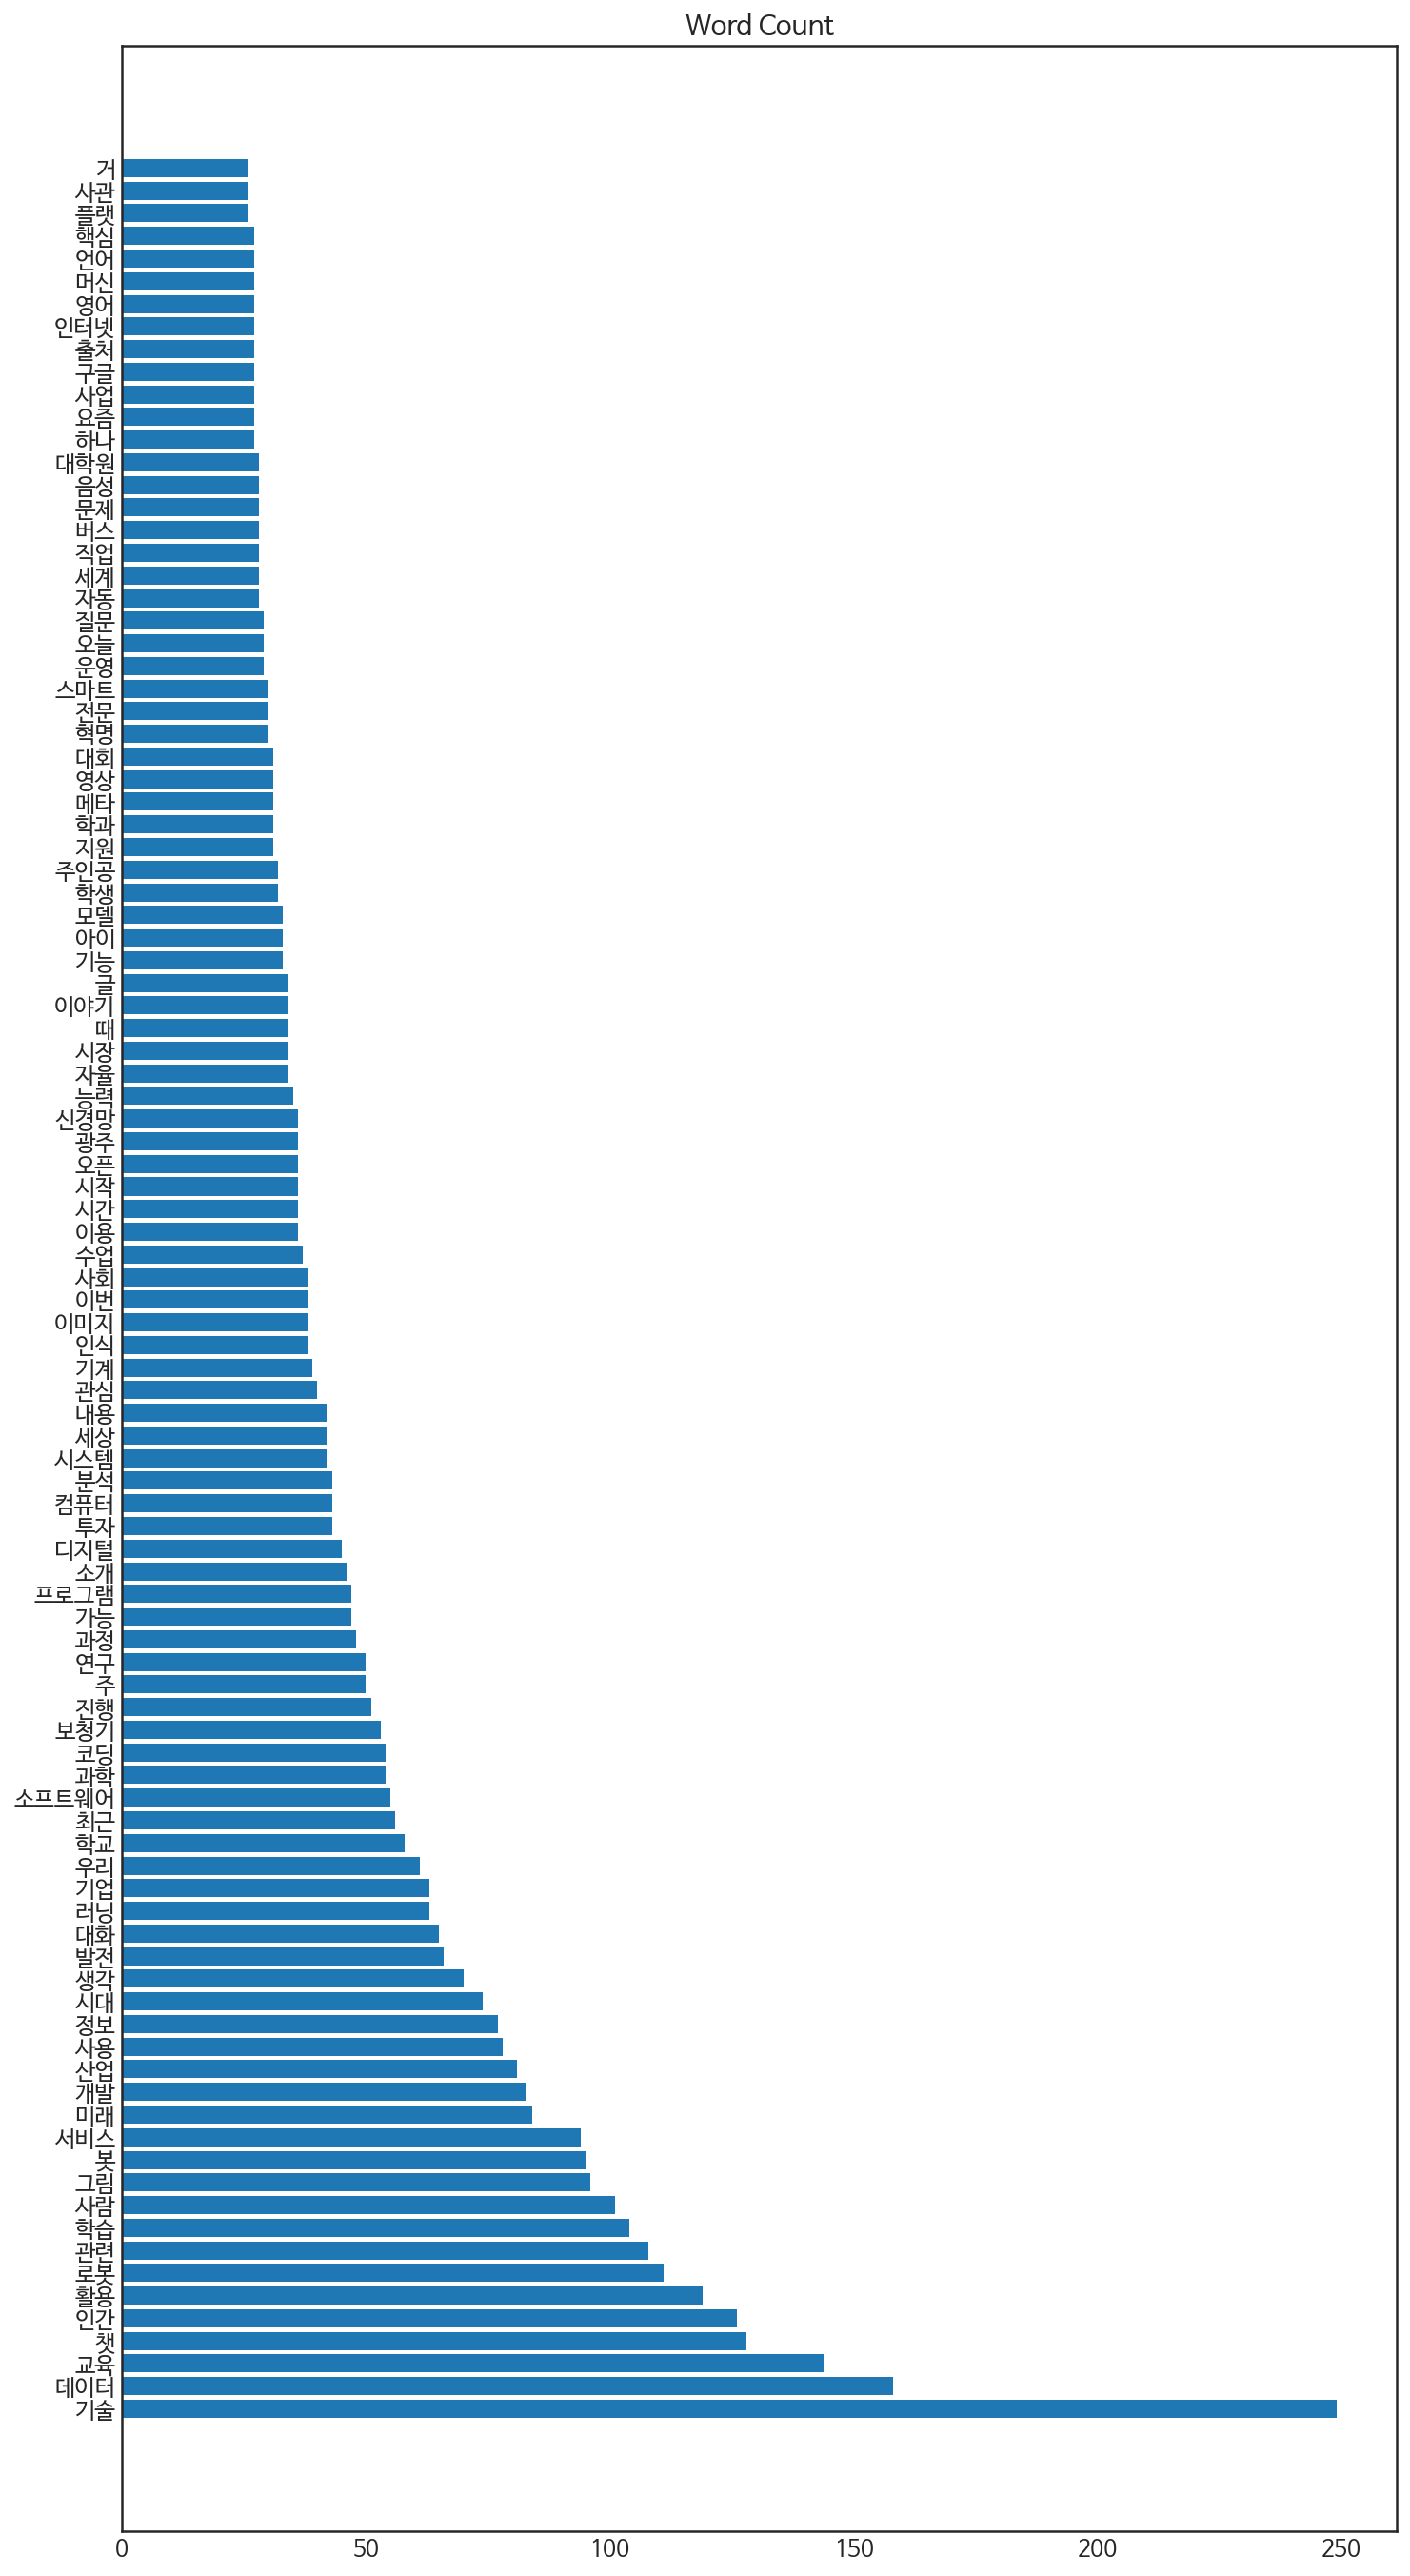

In [39]:
plt.rcParams["font.size"] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12, 24))
plt.barh(y_pos, top_blog_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_blog_nouns.keys())
plt.show()

### 트리맵 시각화

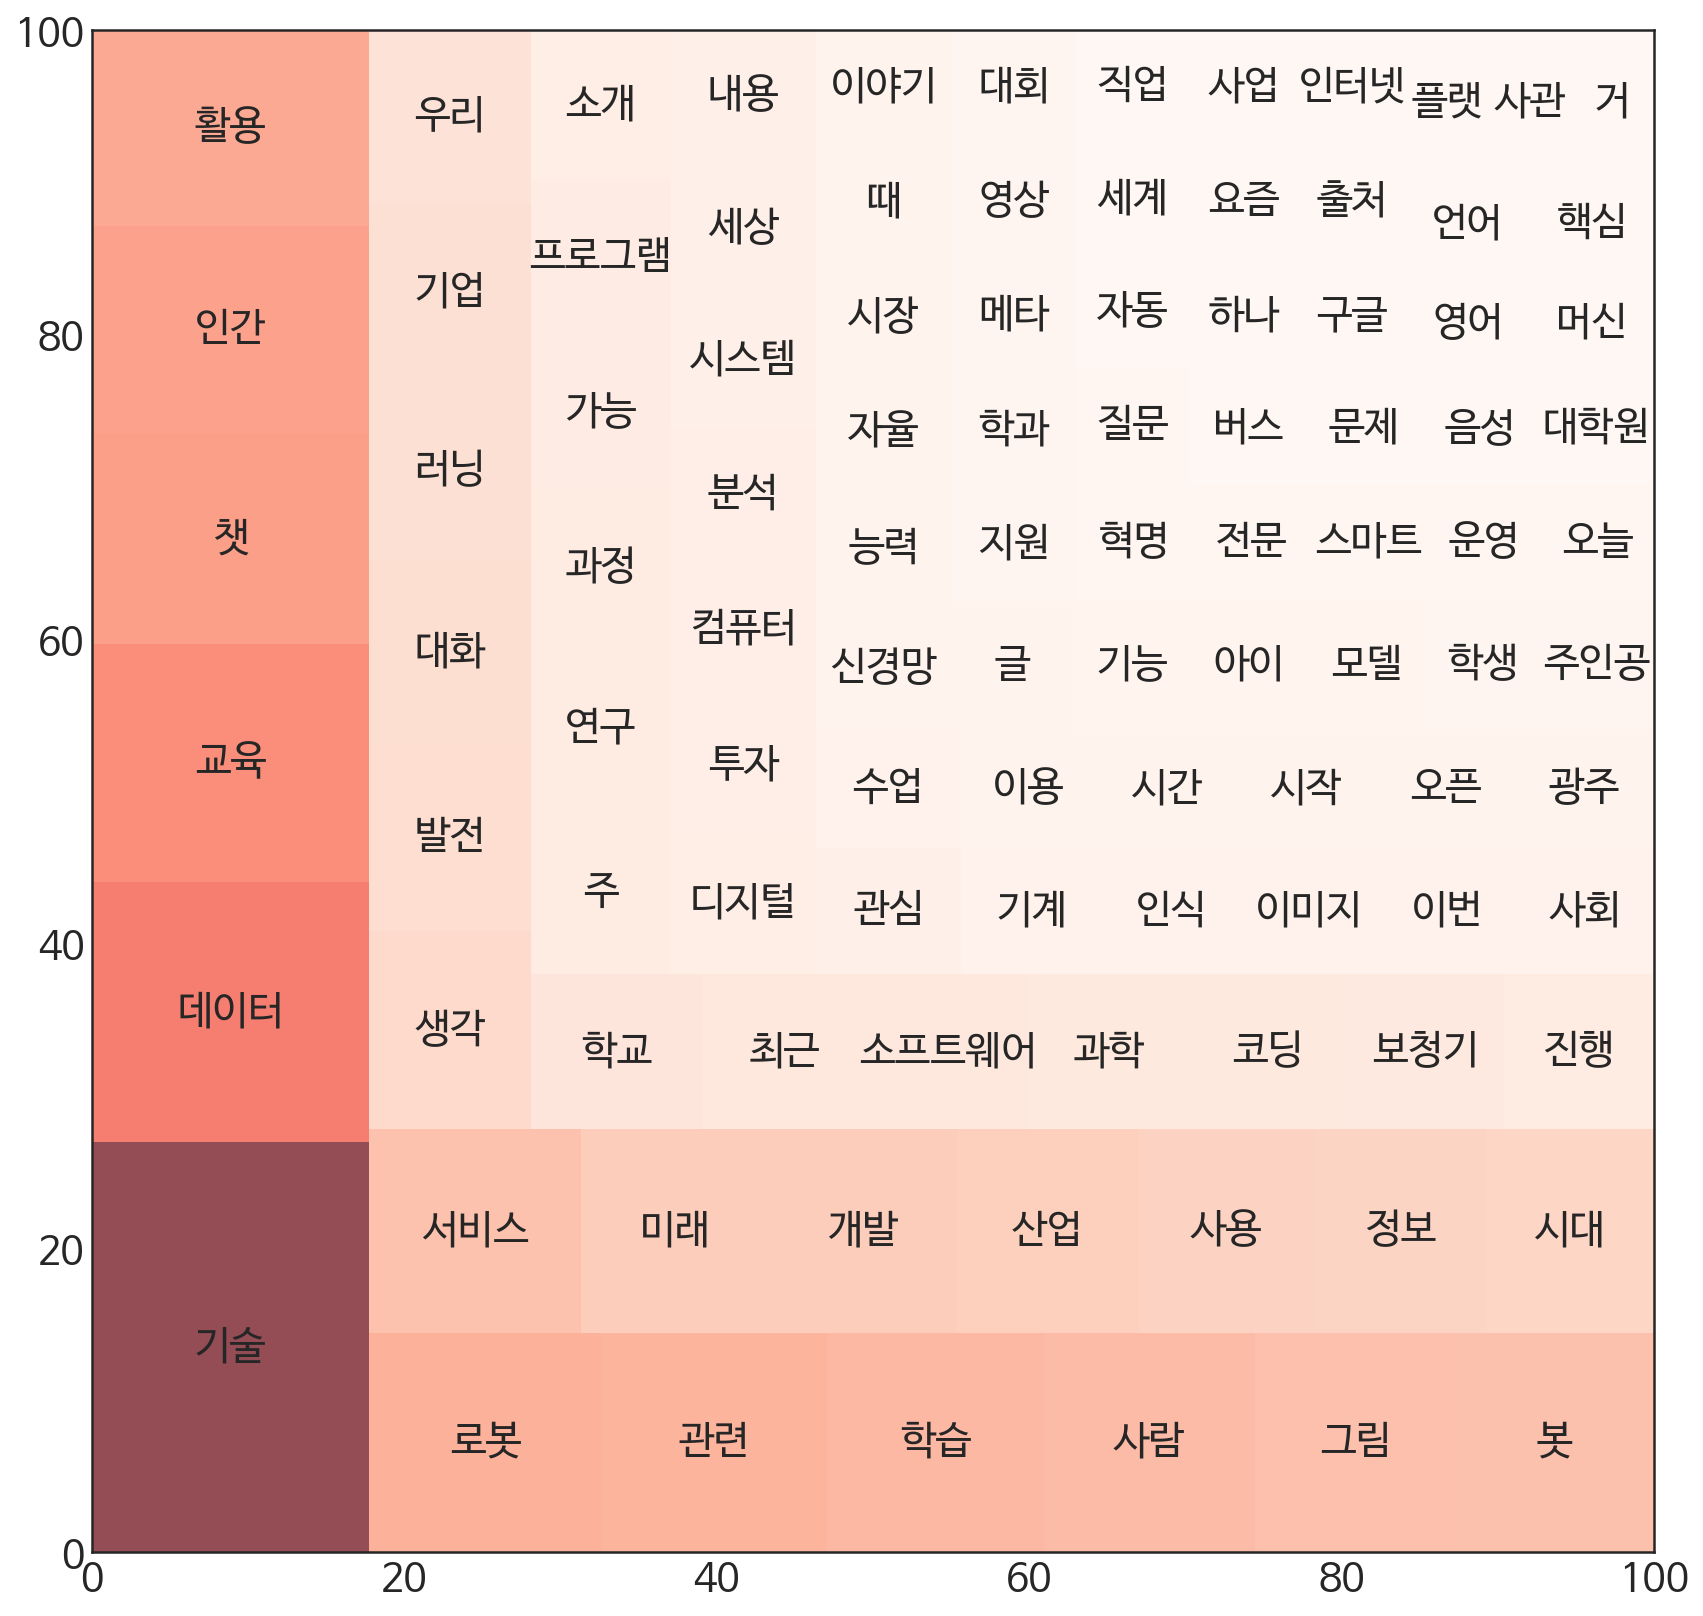

In [40]:
plt.rcParams["figure.figsize"] = (14, 14)
plt.rcParams["font.size"] = 20

norm = mpl.colors.Normalize(vmin=min(top_blog_nouns.values()),
                            vmax=max(top_blog_nouns.values()))
colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label=top_blog_nouns.keys(),
              sizes=top_blog_nouns.values(),
              color=colors,
              alpha=.7);

### 워드클라우드 시각화

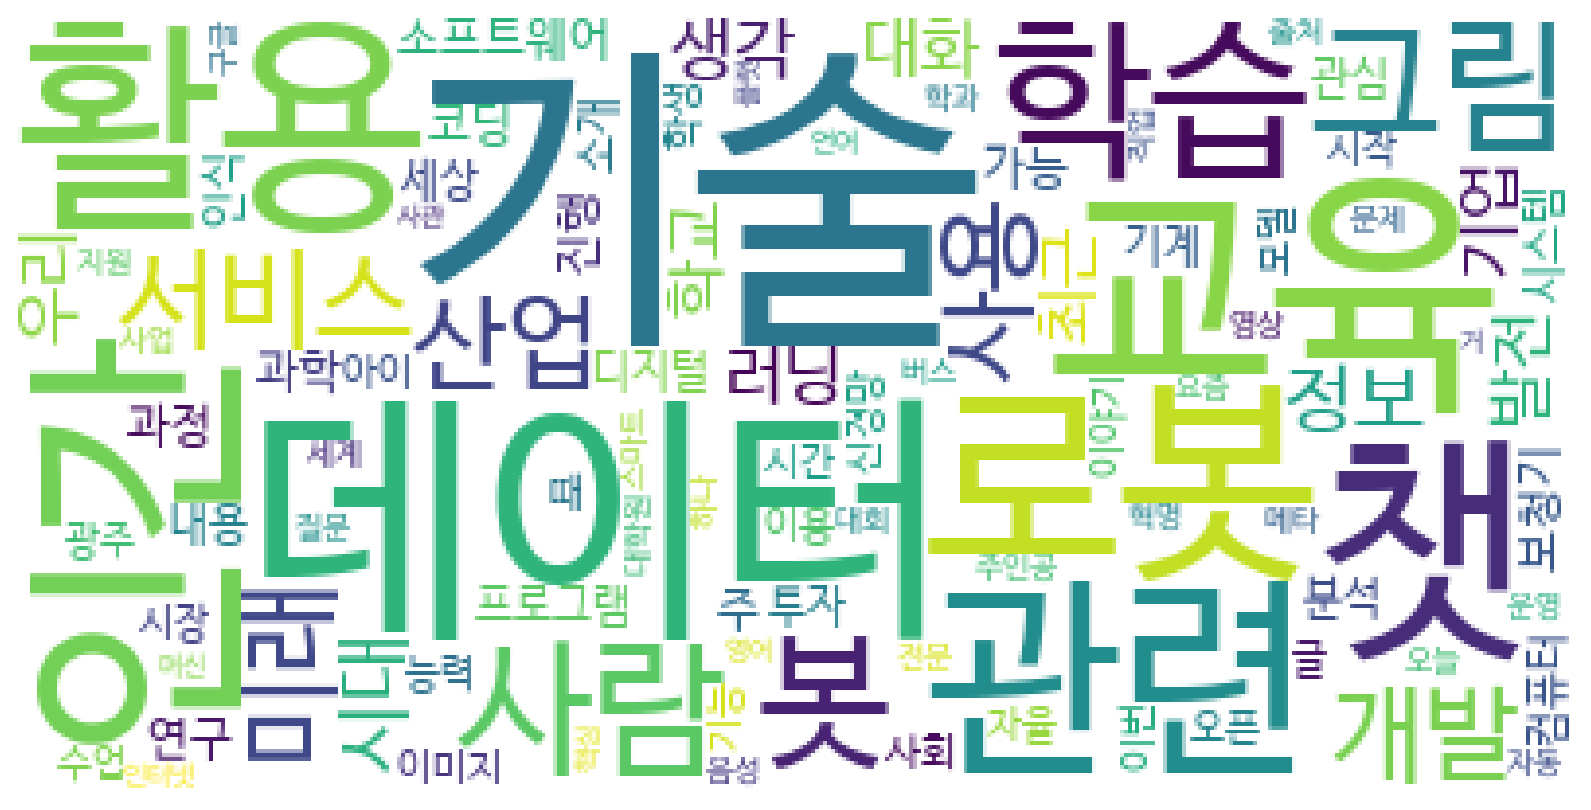

In [41]:
wc = WordCloud(background_color="white", font_path="./font/NanumBarunGothic.ttf")
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14, 14))
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)
plt.show()